In [113]:
# Load Packages
library('ggplot2') # visualization
library('scales') # visualization
library('dplyr') # data manipulation
library('gridExtra')
library('corrplot')
# install.packages("InformationValue")
# install.packages("kableExtra")
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200) # display

In [114]:
# read the two "header" lines in the data file and divide the samples for training and testing 
data <- read.table("card.csv",sep=",",skip=2,header=FALSE)
header <- scan("card.csv",sep=",",nlines=2,what=character())
set.seed(1234)
n = length(data$V1)
index <- 1:nrow(data)
testindex <- sample(index, trunc(n)/4)
test.data <- data[testindex,]
train.data <- data[-testindex,]
df <- data # copy of data, as.factor not applied to df

# 2. Exploratory Data Analysis

# 2.1 Overview of Data

In [115]:
colnames(data) <- c("ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
                    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4",
                    "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2",
                    "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
                    "default_payment_next_month")

names(df) <- c("ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
                    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4",
                    "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2",
                    "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
                    "default_payment_next_month")
# check for missing values
number_of_missing_values_in_each_column = sapply(data, function(x) sum(is.na(x)))
cat("Number of missing values for each column: ", number_of_missing_values_in_each_column)
number_of_missing_values = sum(is.na(data))
cat("\nNumber of missing values in the entire dataset: ", number_of_missing_values)

Number of missing values for each column:  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Number of missing values in the entire dataset:  0

In [116]:
# converting categorical variables into factors
factor_vars <- c('SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default_payment_next_month')
data[factor_vars] <- lapply(data[factor_vars], function(x) as.factor(x))
summary(data)             
cat("Among the total 30000 observations, 6636 observations or 22.1% are cardholders with default payment.")

       ID          LIMIT_BAL       SEX       EDUCATION MARRIAGE 
 Min.   :    1   Min.   :  10000   1:11888   0:   14   0:   54  
 1st Qu.: 7501   1st Qu.:  50000   2:18112   1:10585   1:13659  
 Median :15000   Median : 140000             2:14030   2:15964  
 Mean   :15000   Mean   : 167484             3: 4917   3:  323  
 3rd Qu.:22500   3rd Qu.: 240000             4:  123            
 Max.   :30000   Max.   :1000000             5:  280            
                                             6:   51            
      AGE            PAY_0           PAY_2           PAY_3      
 Min.   :21.00   0      :14737   0      :15730   0      :15764  
 1st Qu.:28.00   -1     : 5686   -1     : 6050   -1     : 5938  
 Median :34.00   1      : 3688   2      : 3927   -2     : 4085  
 Mean   :35.49   -2     : 2759   -2     : 3782   2      : 3819  
 3rd Qu.:41.00   2      : 2667   3      :  326   3      :  240  
 Max.   :79.00   3      :  322   4      :   99   4      :   76  
                 (Other):

Among the total 30000 observations, 6636 observations or 22.1% are cardholders with default payment.

# 2.2 Distribution of Target Variable

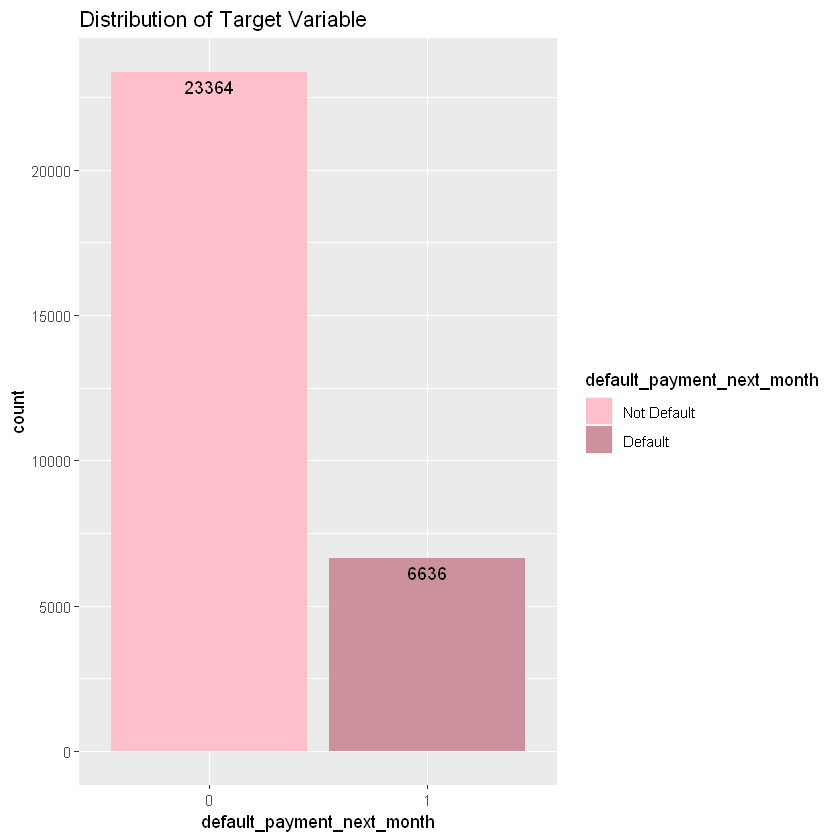

In [90]:
# Distribution of Target Variable
h1 <- ggplot(data, aes(x=default_payment_next_month, fill=default_payment_next_month)) + 
  geom_bar(position = "dodge") + 
  ggtitle("Distribution of Target Variable") + 
  geom_text(aes(label=..count..), stat = "count", vjust = 1.5, nudge_y = -0.5, colour = "black") + 
  scale_fill_manual(values = c("pink", "pink3"), labels=c('Not Default', 'Default'))
h1

# 2.3 Distribution of Categorical Variables

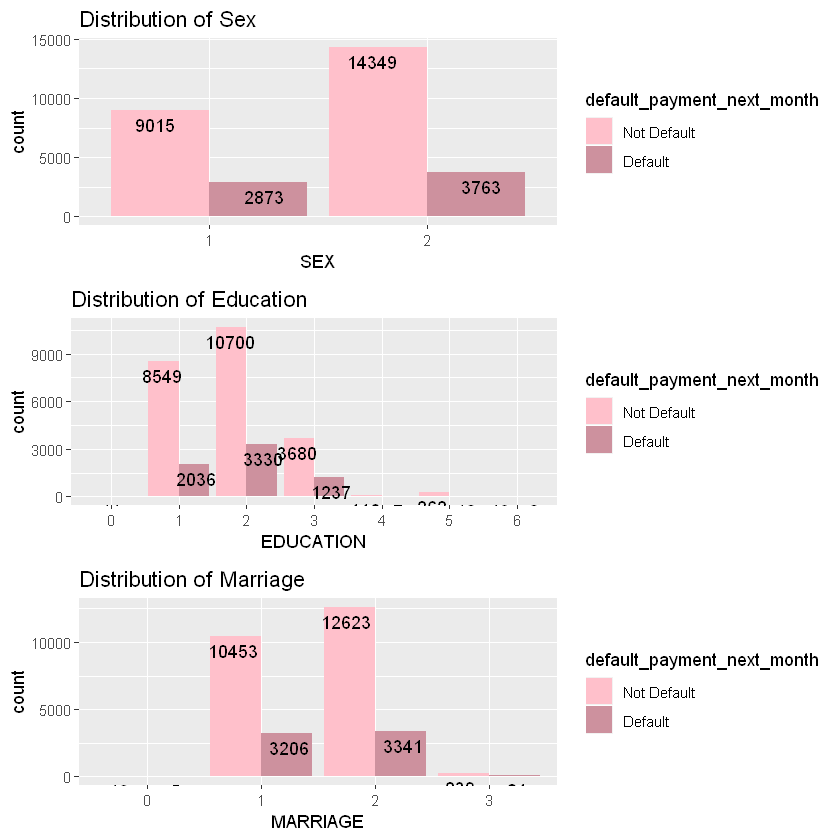

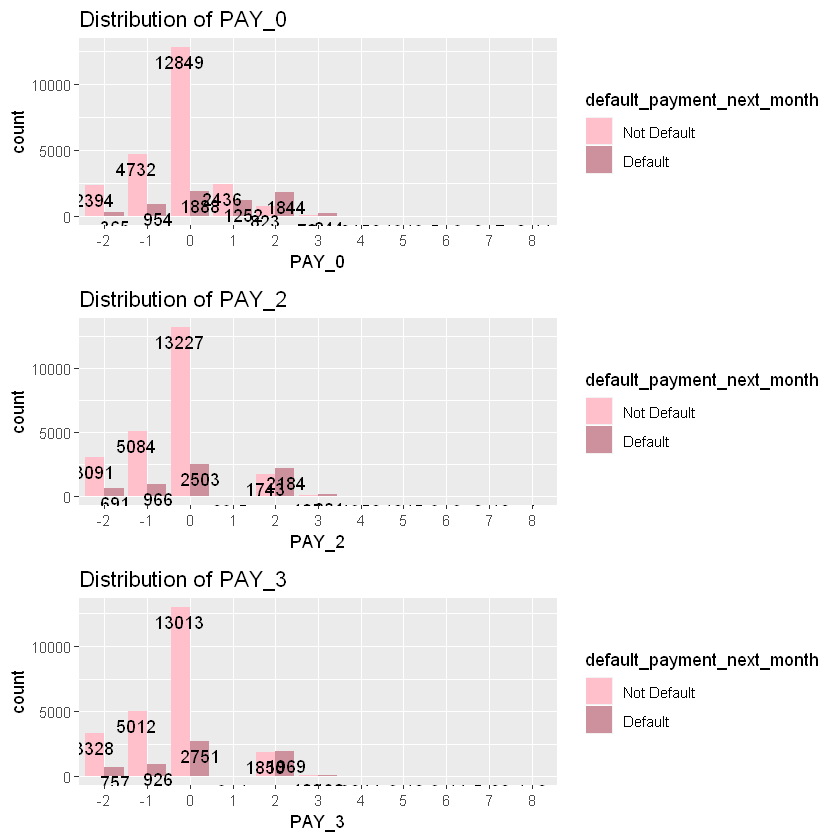

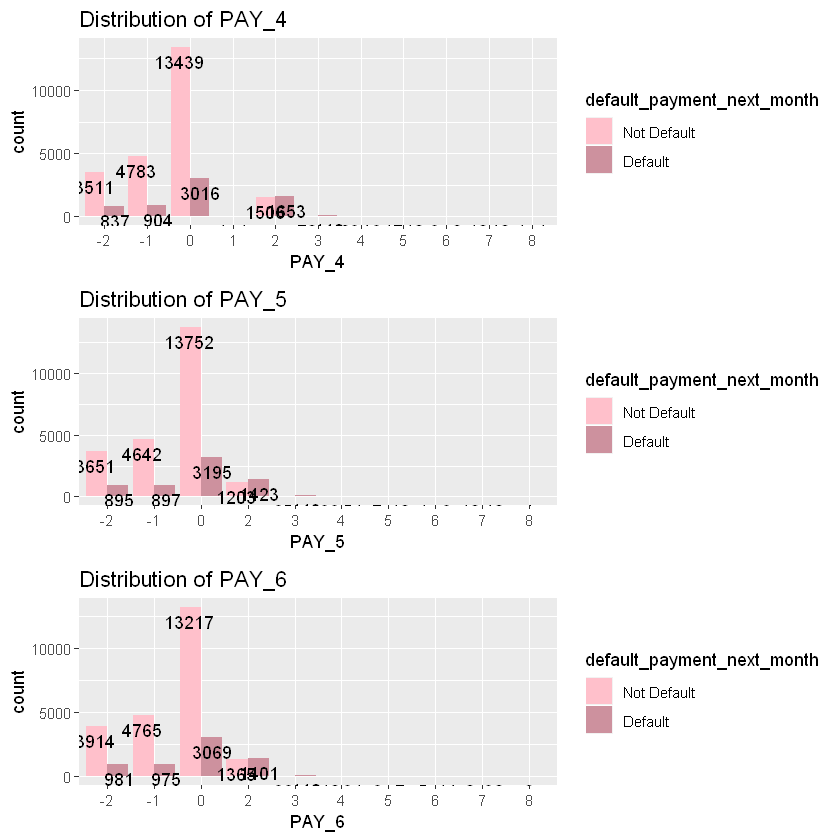

In [117]:
# Distribution of Categorical Variables
h2 <- ggplot(data, aes(x=SEX, fill=default_payment_next_month)) + 
  geom_bar(position = "dodge") + 
  ggtitle("Distribution of Sex") + 
  geom_text(aes(label=..count..), stat = "count", colour = "black", vjust = 1.5, position = position_dodge(width = 1)) +
  scale_fill_manual(values = c("pink", "pink3"), labels=c('Not Default', 'Default')) 

h3 <- ggplot(data, aes(x=EDUCATION, fill=default_payment_next_month)) + 
  geom_bar(position = "dodge") + 
  ggtitle("Distribution of Education") + 
  geom_text(aes(label=..count..), stat = "count", vjust = 1.5, position = position_dodge(width = 1), colour = "black") +
  scale_fill_manual(values = c("pink", "pink3"), labels=c('Not Default', 'Default')) 

h4 <- ggplot(data, aes(x=MARRIAGE, fill=default_payment_next_month)) + 
  geom_bar(position = "dodge") + 
  ggtitle("Distribution of Marriage") + 
  geom_text(aes(label=..count..), stat = "count", vjust = 1.5, position = position_dodge(width = 1), colour = "black") +
  scale_fill_manual(values = c("pink", "pink3"), labels=c('Not Default', 'Default')) 

h5 <- ggplot(data, aes(x=PAY_0, fill=default_payment_next_month)) + 
  geom_bar(position = "dodge") + 
  ggtitle("Distribution of PAY_0") + 
  geom_text(aes(label=..count..), stat = "count", vjust = 1.5, position = position_dodge(width = 1), colour = "black") +
  scale_fill_manual(values = c("pink", "pink3"), labels=c('Not Default', 'Default')) 

h6 <- ggplot(data, aes(x=PAY_2, fill=default_payment_next_month)) + 
  geom_bar(position = "dodge") + 
  ggtitle("Distribution of PAY_2") + 
  geom_text(aes(label=..count..), stat = "count", vjust = 1.5, position = position_dodge(width = 1), colour = "black") +
  scale_fill_manual(values = c("pink", "pink3"), labels=c('Not Default', 'Default')) 

h7 <- ggplot(data, aes(x=PAY_3, fill=default_payment_next_month)) + 
  geom_bar(position = "dodge") + 
  ggtitle("Distribution of PAY_3") + 
  geom_text(aes(label=..count..), stat = "count", vjust = 1.5, position = position_dodge(width = 1), colour = "black") +
  scale_fill_manual(values = c("pink", "pink3"), labels=c('Not Default', 'Default'))

h8 <- ggplot(data, aes(x=PAY_4, fill=default_payment_next_month)) + 
  geom_bar(position = "dodge") + 
  ggtitle("Distribution of PAY_4") + 
  geom_text(aes(label=..count..), stat = "count", vjust = 1.5, position = position_dodge(width = 1), colour = "black") +
  scale_fill_manual(values = c("pink", "pink3"), labels=c('Not Default', 'Default'))

h9 <- ggplot(data, aes(x=PAY_5, fill=default_payment_next_month)) + 
  geom_bar(position = "dodge") + 
  ggtitle("Distribution of PAY_5") + 
  geom_text(aes(label=..count..), stat = "count", vjust = 1.5, position = position_dodge(width = 1), colour = "black") +
  scale_fill_manual(values = c("pink", "pink3"), labels=c('Not Default', 'Default'))

h10 <- ggplot(data, aes(x=PAY_6, fill=default_payment_next_month)) + 
  geom_bar(position = "dodge") + 
  ggtitle("Distribution of PAY_6") + 
  geom_text(aes(label=..count..), stat = "count", vjust = 1.5, position = position_dodge(width = 1), colour = "black") +
  scale_fill_manual(values = c("pink", "pink3"), labels=c('Not Default', 'Default'))

grid.arrange(h2,h3,h4, nrow = 3)
grid.arrange(h5,h6,h7, nrow = 3)
grid.arrange(h8,h9,h10, nrow = 3)

# 2.4 Trends in Data Set

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


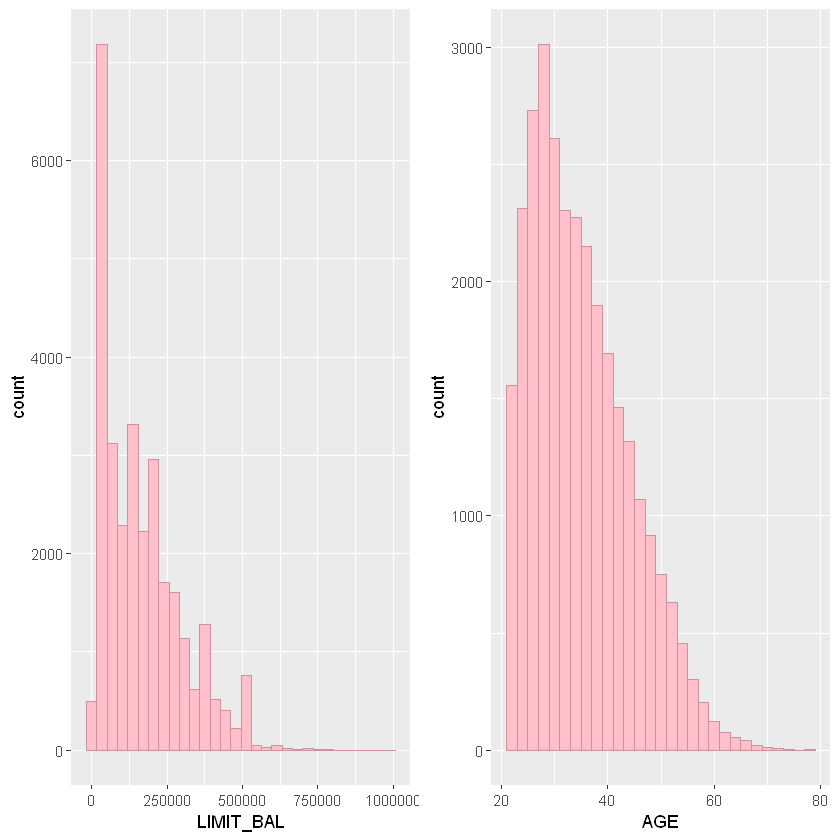

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


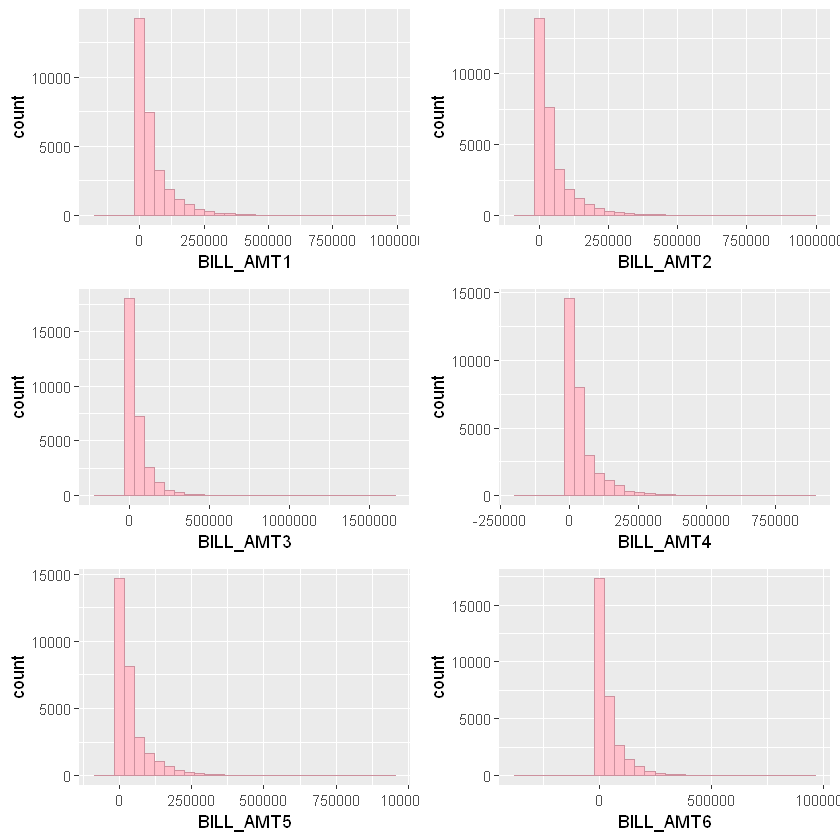

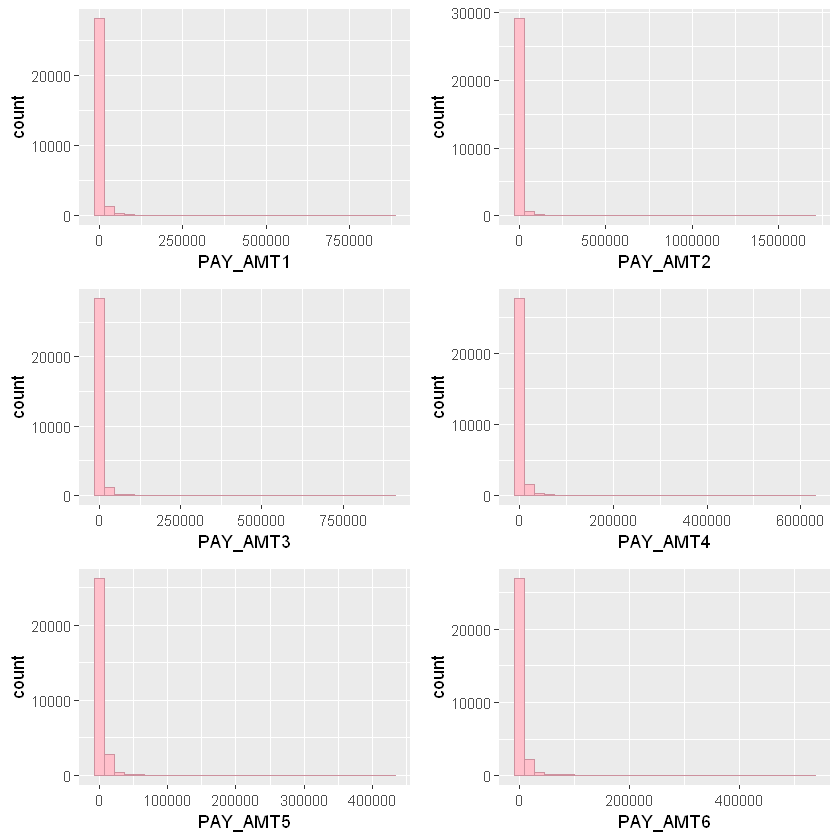

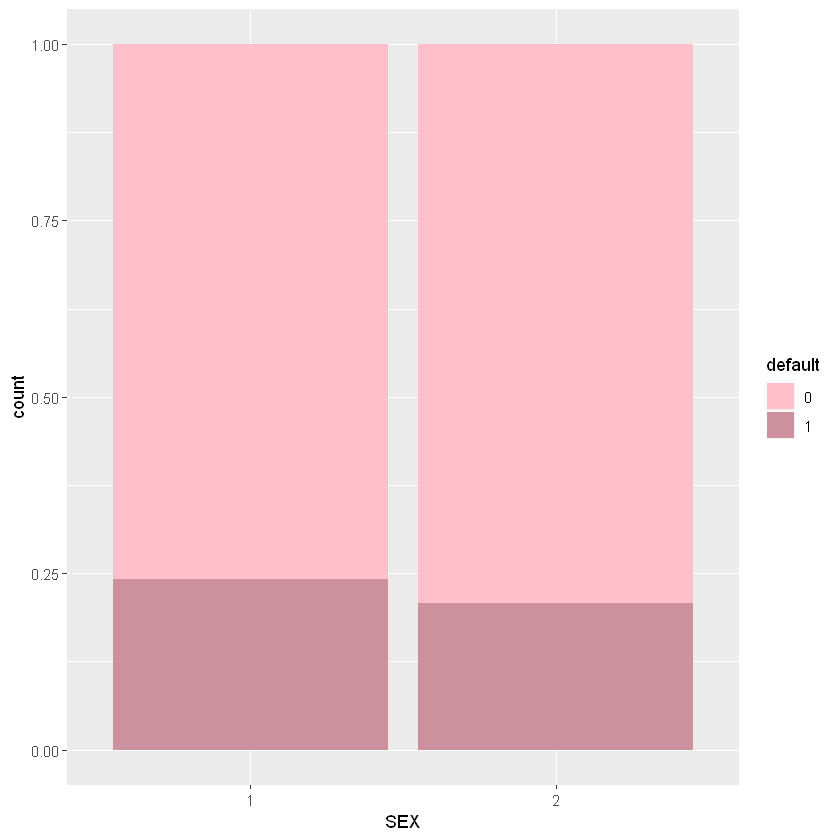

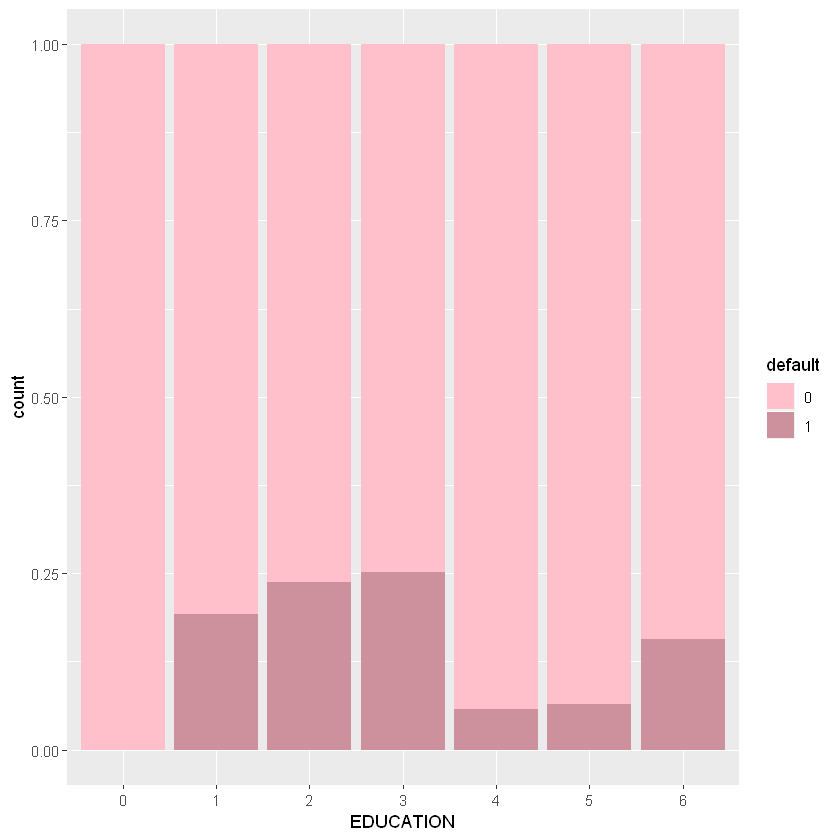

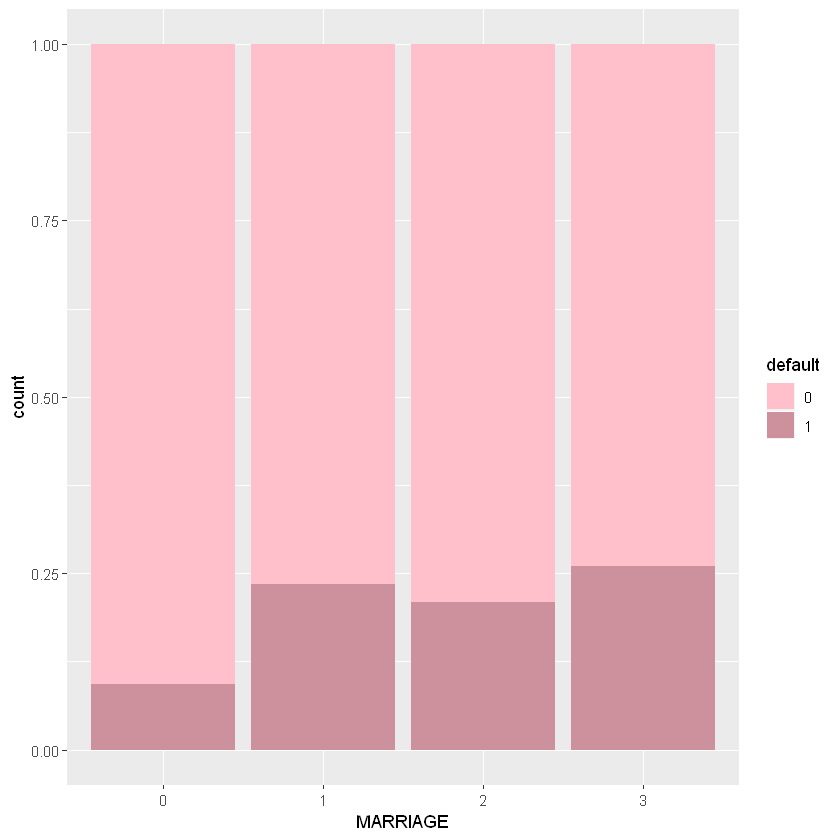

In [118]:
# Trends in Dataset
h1 = ggplot(data, aes(x = LIMIT_BAL)) + geom_histogram(color = "pink3", fill = "pink")
h2 = ggplot(data, aes(x = AGE)) + geom_histogram(color = "pink3",fill = "pink")
h3 = ggplot(data, aes(x = BILL_AMT1)) + geom_histogram(color = "pink3",fill = "pink")
h4 = ggplot(data, aes(x = BILL_AMT2)) + geom_histogram(color = "pink3",fill = "pink")
h5 = ggplot(data, aes(x = BILL_AMT3)) + geom_histogram(color = "pink3",fill = "pink")
h6 = ggplot(data, aes(x = BILL_AMT4)) + geom_histogram(color = "pink3",fill = "pink")
h7 = ggplot(data, aes(x = BILL_AMT5)) + geom_histogram(color = "pink3",fill = "pink")
h8 = ggplot(data, aes(x = BILL_AMT6)) + geom_histogram(color = "pink3",fill = "pink")
h9 = ggplot(data, aes(x = PAY_AMT1)) + geom_histogram(color = "pink3",fill = "pink")
h10 = ggplot(data, aes(x = PAY_AMT2)) + geom_histogram(color = "pink3",fill = "pink")
h11 = ggplot(data, aes(x = PAY_AMT3)) + geom_histogram(color = "pink3",fill = "pink")
h12 = ggplot(data, aes(x = PAY_AMT4)) + geom_histogram(color = "pink3",fill = "pink")
h13 = ggplot(data, aes(x = PAY_AMT5)) + geom_histogram(color = "pink3",fill = "pink")
h14 = ggplot(data, aes(x = PAY_AMT6)) + geom_histogram(color = "pink3",fill = "pink")
grid.arrange(h1,h2, ncol = 2)
grid.arrange(h3,h4,h5,h6,h7,h8, nrow = 3)
grid.arrange(h9,h10,h11,h12,h13,h14, nrow = 3)

b1 = ggplot(data, aes(x = SEX, fill = default_payment_next_month)) +
  geom_bar(position = "fill") + labs(fill = "default") +
  scale_fill_manual(values=c("pink","pink3"))
b2 = ggplot(data, aes(x = EDUCATION, fill = default_payment_next_month)) +
  geom_bar(position = "fill") + labs(fill = "default") +
  scale_fill_manual(values=c("pink","pink3"))
b3 = ggplot(data, aes(x = MARRIAGE, fill = default_payment_next_month)) +
  geom_bar(position = "fill") + labs(fill = "default") + 
  scale_fill_manual(values=c("pink","pink3"))
b1
b2
b3

# 2.5 Inconsistencies in Variables 

In [119]:
table(data$EDUCATION)
table(data$MARRIAGE)
table(data$PAY_0)
table(data$PAY_2)
table(data$PAY_3)
table(data$PAY_4)
table(data$PAY_5)
table(data$PAY_6)


    0     1     2     3     4     5     6 
   14 10585 14030  4917   123   280    51 


    0     1     2     3 
   54 13659 15964   323 


   -2    -1     0     1     2     3     4     5     6     7     8 
 2759  5686 14737  3688  2667   322    76    26    11     9    19 


   -2    -1     0     1     2     3     4     5     6     7     8 
 3782  6050 15730    28  3927   326    99    25    12    20     1 


   -2    -1     0     1     2     3     4     5     6     7     8 
 4085  5938 15764     4  3819   240    76    21    23    27     3 


   -2    -1     0     1     2     3     4     5     6     7     8 
 4348  5687 16455     2  3159   180    69    35     5    58     2 


   -2    -1     0     2     3     4     5     6     7     8 
 4546  5539 16947  2626   178    84    17     4    58     1 


   -2    -1     0     2     3     4     5     6     7     8 
 4895  5740 16286  2766   184    49    13    19    46     2 

# 2.6 Outliers in continuous variables

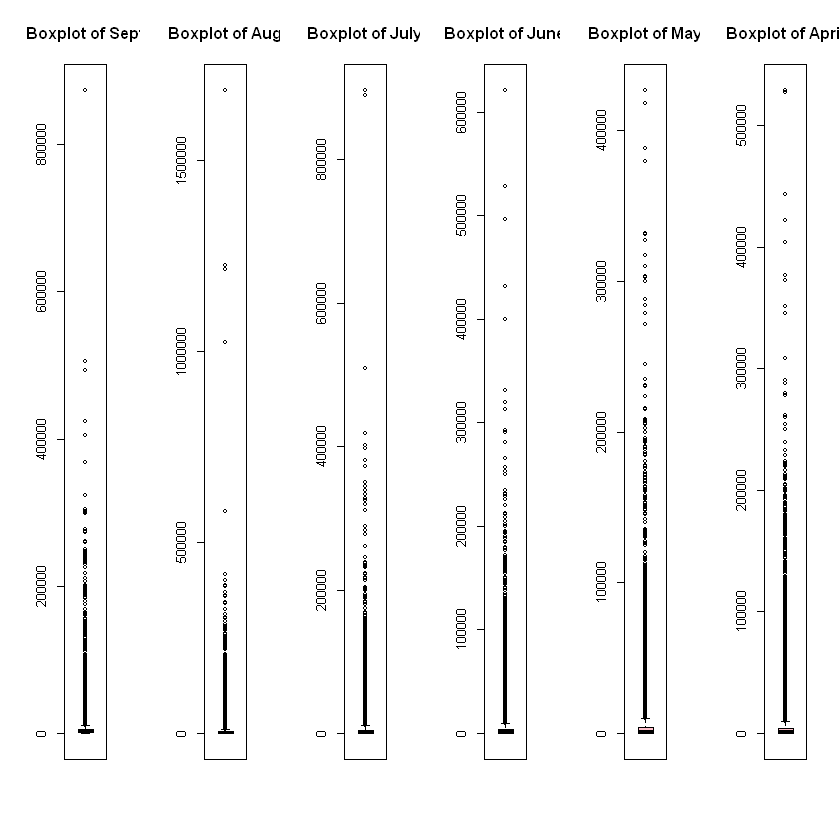

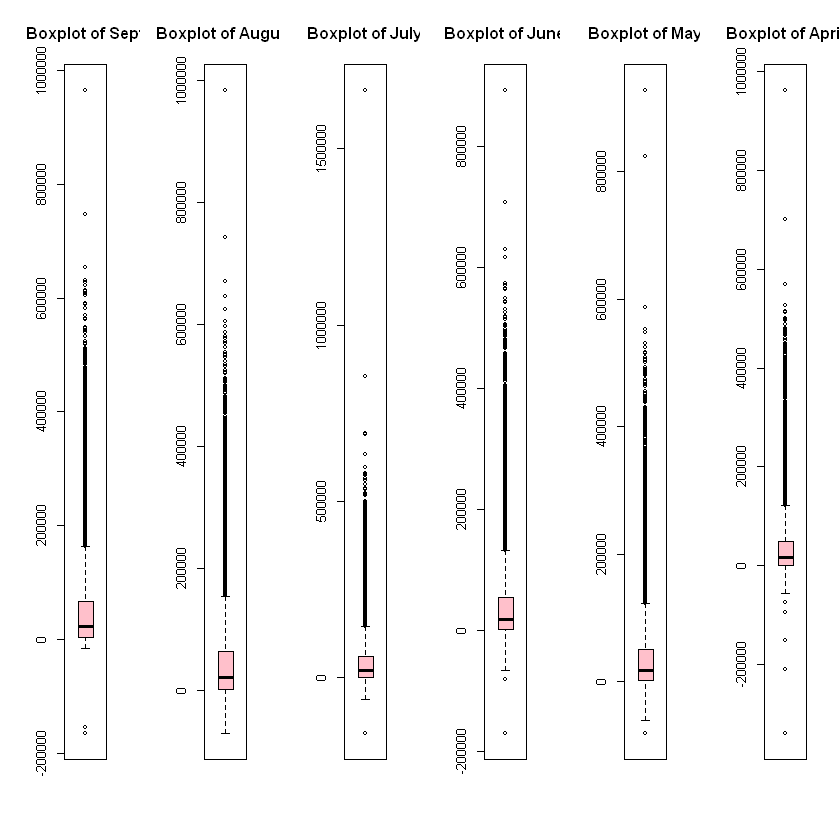

In [120]:
# Outliers in continuous variables
# boxplot
par(mfrow=c(1,6)) 
boxplot(data$PAY_AMT1, col = "pink", main="Boxplot of Sept")
boxplot(data$PAY_AMT2, col = "pink", main="Boxplot of Aug")
boxplot(data$PAY_AMT3, col = "pink", main="Boxplot of July")
boxplot(data$PAY_AMT4, col = "pink", main="Boxplot of June")
boxplot(data$PAY_AMT5, col = "pink", main="Boxplot of May")
boxplot(data$PAY_AMT6, col = "pink", main="Boxplot of April")

boxplot(data$BILL_AMT1, col = "pink", main="Boxplot of Sept")
boxplot(data$BILL_AMT2, col = "pink", main="Boxplot of August")
boxplot(data$BILL_AMT3, col = "pink", main="Boxplot of July")
boxplot(data$BILL_AMT4, col = "pink", main="Boxplot of June")
boxplot(data$BILL_AMT5, col = "pink", main="Boxplot of May")
boxplot(data$BILL_AMT6, col = "pink", main="Boxplot of April")

# 2.7 Correlation and Multicollinearity

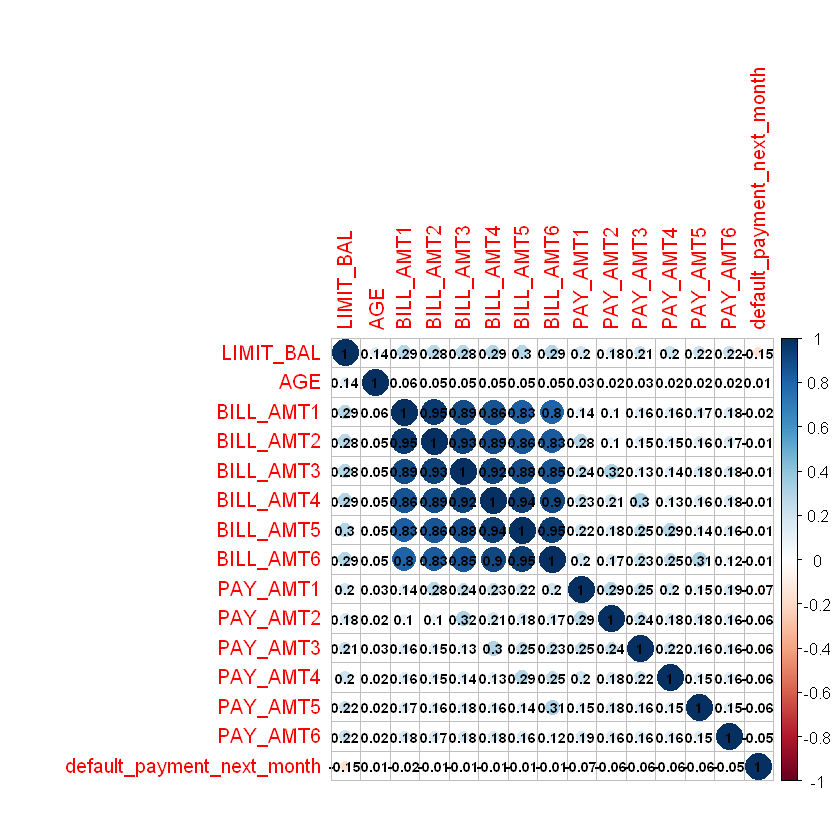

In [121]:
# Correlation & Multicollinearity
names = c("LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2",
                       "BILL_AMT3", "BILL_AMT4", "BILL_AMT5",
                       "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3",
                       "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
                       "default_payment_next_month")
cor_matrix = cor(df[names])
corrplot(cor_matrix, addCoef.col = TRUE, number.cex = 0.7)

# 2.8 Class Imbalance

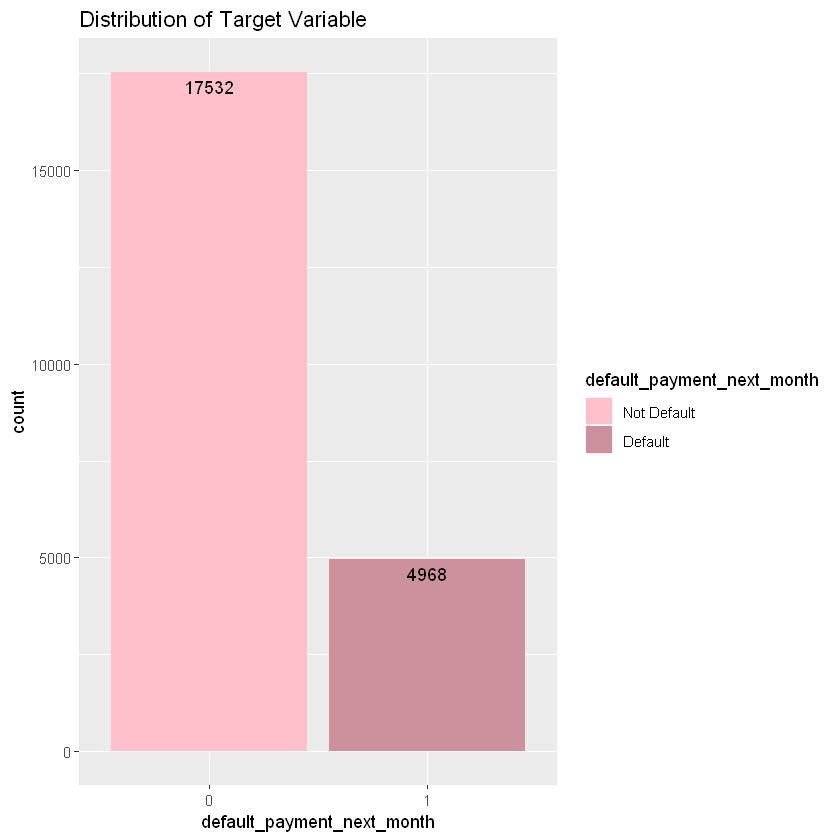

In [122]:
colnames(train.data) <- c("ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
                    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4",
                    "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2",
                    "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
                    "default_payment_next_month")

colnames(test.data) <- c("ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
                    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4",
                    "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2",
                    "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
                    "default_payment_next_month")

train.data1 <- train.data
train.data1$default_payment_next_month <- as.factor(train.data1$default_payment_next_month)

ggplot(train.data1, aes(x=default_payment_next_month, fill=default_payment_next_month)) + 
    geom_bar(position = "dodge") + 
    ggtitle("Distribution of Target Variable") + 
    geom_text(aes(label=..count..), stat = "count", vjust = 1.5, nudge_y = -0.5, colour = "black") + 
    scale_fill_manual(values = c("pink", "pink3"), labels=c("Not Default", "Default"))

# 3. Data Pre-Processing

# 3.2 Re-Categorising Erroneous Data

In [123]:
data <- read.table("card.csv",sep=",",skip=2,header=FALSE)
header <- scan("card.csv",sep=",",nlines=2,what=character())

colnames(data) <- c("ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
                    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4",
                    "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2",
                    "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
                    "default_payment_next_month")

data$EDUCATION[data$EDUCATION == 0] <- 4
data$EDUCATION[data$EDUCATION == 5] <- 4
data$EDUCATION[data$EDUCATION == 6] <- 4

data$MARRIAGE[data$MARRIAGE == 0] <- 3

data$PAY_0[data$PAY_0 == -1] <- 0 
data$PAY_0[data$PAY_0 == -2] <- 0

data$PAY_2[data$PAY_2 == -1] <- 0 
data$PAY_2[data$PAY_2 == -2] <- 0

data$PAY_3[data$PAY_3 == -1] <- 0 
data$PAY_3[data$PAY_3 == -2] <- 0

data$PAY_4[data$PAY_4 == -1] <- 0 
data$PAY_4[data$PAY_4 == -2] <- 0

data$PAY_5[data$PAY_5 == -1] <- 0 
data$PAY_5[data$PAY_5 == -2] <- 0

data$PAY_6[data$PAY_6 == -1] <- 0 
data$PAY_6[data$PAY_6 == -2] <- 0

set.seed(1234)
n = length(data$ID)
index <- 1:nrow(data)
testindex <- sample(index, trunc(n)/4)
test.data <- data[testindex,]
train.data <- data[-testindex,]

# 3.3 Min-Max Scaling 

In [124]:
library(caret)
# preprocess the data
preproc <- preProcess(train.data[,c(2, 13:24)], method=c("range"))

# perform normalization
norm <- predict(preproc, train.data[,c(2, 13:24)])
# train.data.norm <- cbind(train.data[,c(1, 3:12)], norm, train.data[25])
train.data.norm <- cbind(train.data[,c(1, 3:12)], norm, train.data$default_payment_next_month)
names(train.data.norm)[names(train.data.norm) == "train.data$default_payment_next_month"] <- "default_payment_next_month"
summary(train.data.norm)

# test data
preproc2 <- preProcess(test.data[,c(2, 13:24)], method=c("range"))
norm2 <- predict(preproc, test.data[,c(2, 13:24)])
test.data.norm <- cbind(test.data[,c(1, 3:12)], norm2, test.data$default_payment_next_month)
names(test.data.norm)[names(test.data.norm) == "test.data$default_payment_next_month"] <- "default_payment_next_month"
summary(test.data.norm)

       ID             SEX          EDUCATION        MARRIAGE    
 Min.   :    1   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.: 7510   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15048   Median :2.000   Median :2.000   Median :2.000  
 Mean   :15022   Mean   :1.602   Mean   :1.846   Mean   :1.556  
 3rd Qu.:22550   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :2.000   Max.   :4.000   Max.   :3.000  
      AGE            PAY_0           PAY_2            PAY_3       
 Min.   :21.00   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:28.00   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :34.00   Median :0.000   Median :0.0000   Median :0.0000  
 Mean   :35.51   Mean   :0.354   Mean   :0.3171   Mean   :0.3004  
 3rd Qu.:41.00   3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :79.00   Max.   :8.000   Max.   :8.0000   Max.   :8.0000  
     PAY_4            PAY_5            PAY_6          LIMIT_BAL     
 Min.  

       ID             SEX          EDUCATION        MARRIAGE    
 Min.   :   23   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.: 7483   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :14860   Median :2.000   Median :2.000   Median :2.000  
 Mean   :14935   Mean   :1.608   Mean   :1.832   Mean   :1.561  
 3rd Qu.:22324   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :29995   Max.   :2.000   Max.   :4.000   Max.   :3.000  
      AGE            PAY_0            PAY_2            PAY_3       
 Min.   :21.00   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:28.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :34.00   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :35.41   Mean   :0.3651   Mean   :0.3288   Mean   :0.3149  
 3rd Qu.:41.00   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :75.00   Max.   :8.0000   Max.   :7.0000   Max.   :8.0000  
     PAY_4            PAY_5            PAY_6          LIMIT_BAL     


In [125]:
# edu_mat <- data %>% 
#   select(c(EDUCATION, default_payment_next_month)) %>% 
#   group_by(EDUCATION, default_payment_next_month) %>% 
#   summarize(count = n())

# g1 <- ggplot(edu_mat, aes(x = EDUCATION, y = count, fill = default_payment_next_month)) + 
#   geom_bar(stat = "identity") +
#   ggtitle("Distribution of Education") + 
#   scale_fill_manual(labels=c('Not Default', 'Default'), "legend", values = c("0" = "pink", "1" = "pink3"))

# ms_mat <- data %>% 
#   select(c(MARRIAGE, default_payment_next_month)) %>% 
#   group_by(MARRIAGE, default_payment_next_month) %>% 
#   summarize(count = n())

# g2 <- ggplot(ms_mat, aes(x = MARRIAGE, y = count, fill = default_payment_next_month)) + 
#   geom_bar(stat = "identity") +
#   ggtitle("Distribution of Marital Status") + 
#   scale_fill_manual(labels=c('Not Default', 'Default'), "legend", values = c("0" = "pink", "1" = "pink3"))

# grid.arrange(g1,g2, ncol = 2)

table(data$EDUCATION)
table(data$MARRIAGE)
table(data$PAY_0)
table(data$PAY_2)
table(data$PAY_3)
table(data$PAY_4)
table(data$PAY_5)
table(data$PAY_6)


    1     2     3     4 
10585 14030  4917   468 


    1     2     3 
13659 15964   377 


    0     1     2     3     4     5     6     7     8 
23182  3688  2667   322    76    26    11     9    19 


    0     1     2     3     4     5     6     7     8 
25562    28  3927   326    99    25    12    20     1 


    0     1     2     3     4     5     6     7     8 
25787     4  3819   240    76    21    23    27     3 


    0     1     2     3     4     5     6     7     8 
26490     2  3159   180    69    35     5    58     2 


    0     2     3     4     5     6     7     8 
27032  2626   178    84    17     4    58     1 


    0     2     3     4     5     6     7     8 
26921  2766   184    49    13    19    46     2 

# 4. Feature Selection 

# 4.1 Filter Method

# 4.1.1 Selection using Statistical Tests (t-test and chi-square test)

In [102]:
chisq.test(train.data.norm$default_payment_next_month, train.data.norm$SEX)
chisq.test(train.data.norm$default_payment_next_month, train.data.norm$EDUCATION)
chisq.test(train.data.norm$default_payment_next_month, train.data.norm$MARRIAGE)

t.test(LIMIT_BAL ~ default_payment_next_month, data = train.data.norm)
t.test(AGE ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_0 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_2 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_3 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_4 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_5 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_6 ~ default_payment_next_month, data = train.data.norm)
t.test(BILL_AMT1 ~ default_payment_next_month, data = train.data.norm)
t.test(BILL_AMT2 ~ default_payment_next_month, data = train.data.norm)
t.test(BILL_AMT3 ~ default_payment_next_month, data = train.data.norm)
t.test(BILL_AMT4 ~ default_payment_next_month, data = train.data.norm)
t.test(BILL_AMT5 ~ default_payment_next_month, data = train.data.norm)
t.test(BILL_AMT6 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_AMT1 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_AMT2 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_AMT3 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_AMT4 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_AMT5 ~ default_payment_next_month, data = train.data.norm)
t.test(PAY_AMT6 ~ default_payment_next_month, data = train.data.norm)


	Pearson's Chi-squared test with Yates' continuity correction

data:  train.data.norm$default_payment_next_month and train.data.norm$SEX
X-squared = 31.658, df = 1, p-value = 0.00000001838



	Pearson's Chi-squared test

data:  train.data.norm$default_payment_next_month and train.data.norm$EDUCATION
X-squared = 123.75, df = 3, p-value < 0.00000000000000022



	Pearson's Chi-squared test

data:  train.data.norm$default_payment_next_month and train.data.norm$MARRIAGE
X-squared = 21.533, df = 2, p-value = 0.0000211



	Welch Two Sample t-test

data:  LIMIT_BAL by default_payment_next_month
t = 25.085, df = 9000.8, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04455824 0.05211249
sample estimates:
mean in group 0 mean in group 1 
      0.1693559       0.1210205 



	Welch Two Sample t-test

data:  AGE by default_payment_next_month
t = -1.8675, df = 7584.4, p-value = 0.06187
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.59055373  0.01431302
sample estimates:
mean in group 0 mean in group 1 
       35.44678        35.73490 



	Welch Two Sample t-test

data:  PAY_0 by default_payment_next_month
t = -46.832, df = 5723.2, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.758795 -0.697821
sample estimates:
mean in group 0 mean in group 1 
      0.1931896       0.9214976 



	Welch Two Sample t-test

data:  PAY_2 by default_payment_next_month
t = -38.576, df = 5863.8, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6614242 -0.5974498
sample estimates:
mean in group 0 mean in group 1 
      0.1781314       0.8075684 



	Welch Two Sample t-test

data:  PAY_3 by default_payment_next_month
t = -33.293, df = 5826.3, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5805538 -0.5159877
sample estimates:
mean in group 0 mean in group 1 
      0.1793863       0.7276570 



	Welch Two Sample t-test

data:  PAY_4 by default_payment_next_month
t = -29.868, df = 5674.8, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5282123 -0.4631443
sample estimates:
mean in group 0 mean in group 1 
      0.1448209       0.6404992 



	Welch Two Sample t-test

data:  PAY_5 by default_payment_next_month
t = -28.269, df = 5568.6, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4907983 -0.4271414
sample estimates:
mean in group 0 mean in group 1 
      0.1185261       0.5774960 



	Welch Two Sample t-test

data:  PAY_6 by default_payment_next_month
t = -27.216, df = 5620.7, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4665364 -0.4038431
sample estimates:
mean in group 0 mean in group 1 
      0.1290212       0.5642110 



	Welch Two Sample t-test

data:  BILL_AMT1 by default_payment_next_month
t = 2.8957, df = 7967.5, p-value = 0.003793
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0009961565 0.0051711473
sample estimates:
mean in group 0 mean in group 1 
      0.1850348       0.1819511 



	Welch Two Sample t-test

data:  BILL_AMT2 by default_payment_next_month
t = 2.0563, df = 7942.5, p-value = 0.03978
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0001052985 0.0044028797
sample estimates:
mean in group 0 mean in group 1 
      0.1135900       0.1113359 



	Welch Two Sample t-test

data:  BILL_AMT3 by default_payment_next_month
t = 2.3502, df = 8187.6, p-value = 0.01879
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0002361426 0.0026105441
sample estimates:
mean in group 0 mean in group 1 
      0.1125457       0.1111224 



	Welch Two Sample t-test

data:  BILL_AMT4 by default_payment_next_month
t = 1.6662, df = 8048.3, p-value = 0.09571
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.000286421  0.003532196
sample estimates:
mean in group 0 mean in group 1 
      0.2014473       0.1998244 



	Welch Two Sample t-test

data:  BILL_AMT5 by default_payment_next_month
t = 1.2876, df = 7991.7, p-value = 0.1979
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0006549815  0.0031623030
sample estimates:
mean in group 0 mean in group 1 
      0.1211120       0.1198584 



	Welch Two Sample t-test

data:  BILL_AMT6 by default_payment_next_month
t = 1.3101, df = 8143.8, p-value = 0.1902
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0005263141  0.0026473134
sample estimates:
mean in group 0 mean in group 1 
      0.2121861       0.2111256 



	Welch Two Sample t-test

data:  PAY_AMT1 by default_payment_next_month
t = 14.565, df = 13455, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.004951021 0.006490840
sample estimates:
mean in group 0 mean in group 1 
    0.012740343     0.007019412 



	Welch Two Sample t-test

data:  PAY_AMT2 by default_payment_next_month
t = 14.331, df = 20389, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.001760159 0.002317914
sample estimates:
mean in group 0 mean in group 1 
    0.003946691     0.001907655 



	Welch Two Sample t-test

data:  PAY_AMT3 by default_payment_next_month
t = 9.5908, df = 10117, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.002038409 0.003085690
sample estimates:
mean in group 0 mean in group 1 
    0.006413678     0.003851628 



	Welch Two Sample t-test

data:  PAY_AMT4 by default_payment_next_month
t = 9.9874, df = 10822, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.003229500 0.004806732
sample estimates:
mean in group 0 mean in group 1 
    0.010130843     0.006112727 



	Welch Two Sample t-test

data:  PAY_AMT5 by default_payment_next_month
t = 10.465, df = 11275, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.004049113 0.005915589
sample estimates:
mean in group 0 mean in group 1 
    0.012393760     0.007411409 



	Welch Two Sample t-test

data:  PAY_AMT6 by default_payment_next_month
t = 10.843, df = 11752, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.003798863 0.005475431
sample estimates:
mean in group 0 mean in group 1 
    0.010901369     0.006264222 


# 4.2 Wrapper Method

# 4.2.1 Selection using Boruta Method

In [112]:
library(Boruta)
boruta.train <- Boruta(default_payment_next_month~.-ID, data = train.data.norm, doTrace=2)
print(boruta.train)
final.boruta.train <- TentativeRoughFix(boruta.train)
print(final.boruta.train)

Loading required package: ranger

Attaching package: 'ranger'

The following object is masked from 'package:randomForest':

    importance

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
 12. run of importance source...
After 12 iterations, +8 mins: 
 confirmed 21 attributes: AGE, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4 and 16 more;
 still have 2 attributes left.

 13. run of importance source...
 14. run of importance source...
 15. run of importance source...
 16. run of importance source...
 17. run of importance source...
 18. run of importance source...
 19. run of importance source...
 20. run of importance source...
 21. run of importance source...
 22. run of importance sou

Boruta performed 99 iterations in 1.074979 hours.
 21 attributes confirmed important: AGE, BILL_AMT1, BILL_AMT2,
BILL_AMT3, BILL_AMT4 and 16 more;
 1 attributes confirmed unimportant: SEX;
 1 tentative attributes left: EDUCATION;
Boruta performed 99 iterations in 1.074979 hours.
Tentatives roughfixed over the last 99 iterations.
 22 attributes confirmed important: AGE, BILL_AMT1, BILL_AMT2,
BILL_AMT3, BILL_AMT4 and 17 more;
 1 attributes confirmed unimportant: SEX;


# 4.2.2 Selection using Stepwise AIC Backward Regression

In [103]:
library(MASS)
library(olsrr)
# train.data.norm$default_payment_next_month <- ifelse(train.data.norm$default_payment_next_month == 1, 1, 0)
model <- lm(default_payment_next_month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE +
                    PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 +
                    BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + 
                    BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + 
                    PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6, data = train.data.norm)
step_back <- stepAIC(model, direction="backward")
summary(step_back)

Start:  AIC=-44210.1
default_payment_next_month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + 
    AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + 
    BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + 
    PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6

            Df Sum of Sq    RSS    AIC
- BILL_AMT4  1     0.001 3147.1 -44212
- PAY_AMT3   1     0.002 3147.1 -44212
- BILL_AMT6  1     0.004 3147.1 -44212
- PAY_AMT4   1     0.044 3147.2 -44212
- BILL_AMT5  1     0.107 3147.2 -44211
- BILL_AMT3  1     0.140 3147.3 -44211
- PAY_AMT5   1     0.175 3147.3 -44211
<none>                   3147.1 -44210
- BILL_AMT1  1     0.289 3147.4 -44210
- BILL_AMT2  1     0.298 3147.4 -44210
- PAY_4      1     0.382 3147.5 -44209
- PAY_AMT6   1     0.507 3147.6 -44208
- AGE        1     0.565 3147.7 -44208
- EDUCATION  1     0.618 3147.7 -44208
- PAY_AMT2   1     0.828 3148.0 -44206
- PAY_2      1     0.921 3148.0 -44206
- PAY_5      1     1.069 3148.2 -44204
-


Call:
lm(formula = default_payment_next_month ~ LIMIT_BAL + SEX + EDUCATION + 
    MARRIAGE + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + 
    PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT5 + PAY_AMT1 + PAY_AMT2 + 
    PAY_AMT5 + PAY_AMT6, data = train.data.norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.98105 -0.16919 -0.13279 -0.06081  1.20424 

Coefficients:
              Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  0.2451792  0.0230731  10.626 < 0.0000000000000002 ***
LIMIT_BAL   -0.2126917  0.0224935  -9.456 < 0.0000000000000002 ***
SEX         -0.0163623  0.0051497  -3.177              0.00149 ** 
EDUCATION   -0.0074848  0.0035553  -2.105              0.03528 *  
MARRIAGE    -0.0235326  0.0053149  -4.428      0.0000095724931 ***
AGE          0.0006173  0.0003050   2.024              0.04301 *  
PAY_0        0.1657733  0.0046803  35.419 < 0.0000000000000002 ***
PAY_2        0.0128787  0.0050294   2.561              0.01045 *  
PAY_3        0.0

# 4.2.3 Selection using Lasso Regression

[1] 0.000141461

24 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  0.2296642685
SEX         -0.0162121179
EDUCATION   -0.0071820975
MARRIAGE    -0.0232784670
AGE          0.0005982848
PAY_0        0.1656929510
PAY_2        0.0128258704
PAY_3        0.0248465123
PAY_4        0.0092432904
PAY_5        0.0171908040
PAY_6        0.0368712920
LIMIT_BAL   -0.2100723607
BILL_AMT1   -0.1446106289
BILL_AMT2    0.2304985541
BILL_AMT3    0.2395200808
BILL_AMT4    .           
BILL_AMT5   -0.1531007351
BILL_AMT6   -0.0214281462
PAY_AMT1    -0.3242836485
PAY_AMT2    -0.6169507185
PAY_AMT3     .           
PAY_AMT4    -0.0710978407
PAY_AMT5    -0.1005733355
PAY_AMT6    -0.1531312239

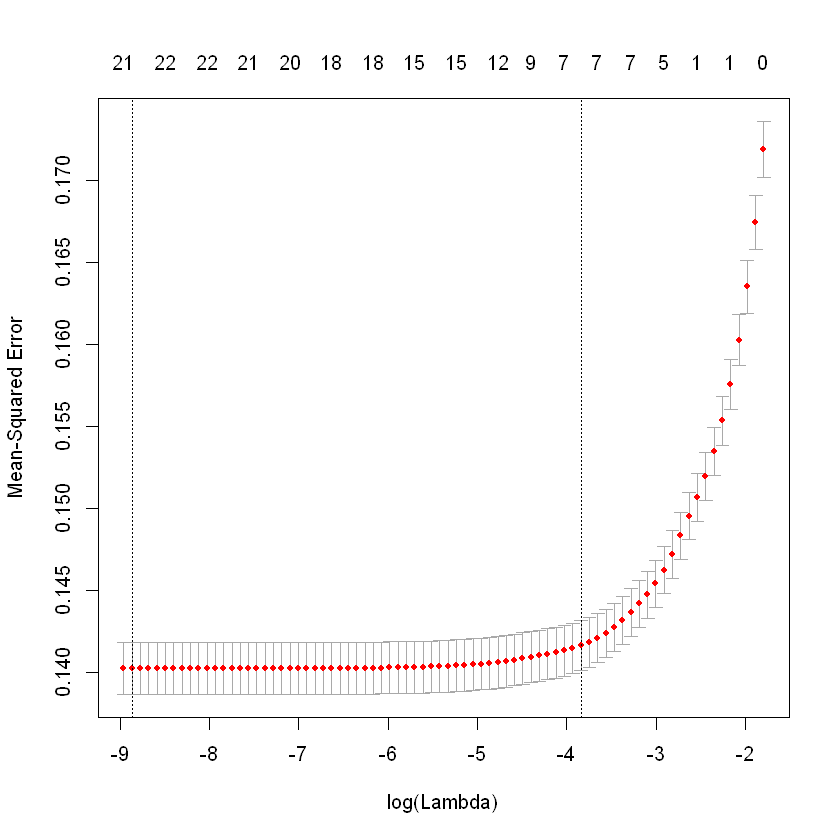

In [104]:
library(glmnet)
x <- data.matrix(train.data.norm[,2:24])
y <- train.data.norm[,25]
                 
#perform k-fold cross-validation to find optimal lambda value
cv_model <- cv.glmnet(x, y, alpha = 1)
#find optimal lambda value that minimizes test MSE
best_lambda <- cv_model$lambda.min
best_lambda
#produce plot of test MSE by lambda value
plot(cv_model) 
#find coefficients of best model
best_model <- glmnet(x, y, alpha = 1, lambda = best_lambda)
coef(best_model)

# 4.3 Embedded Method

# 4.3.1 Selection using Random Forest

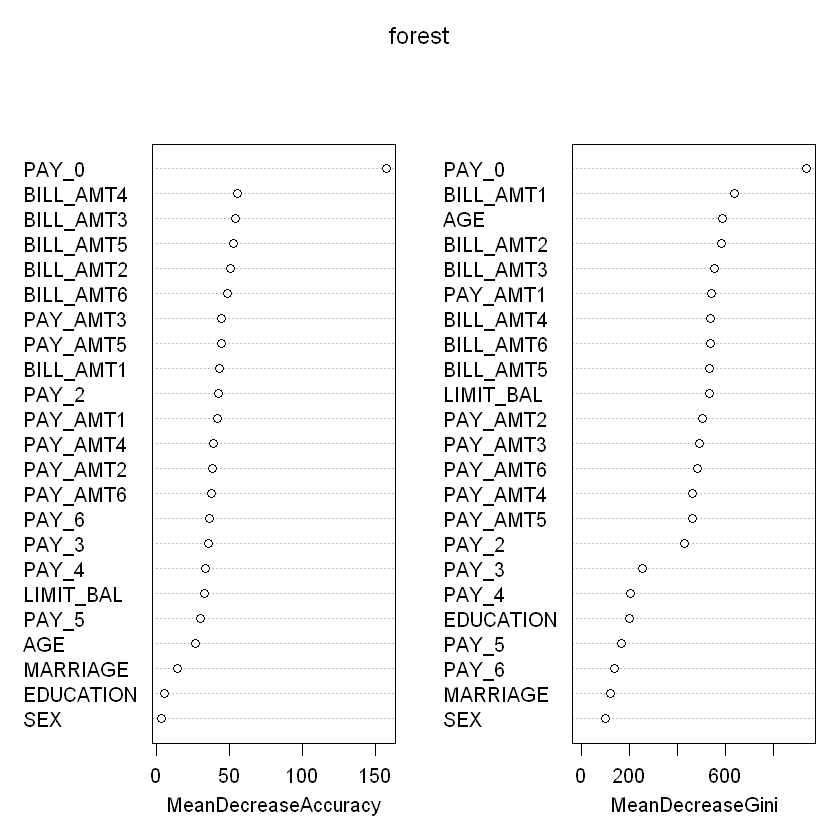

In [105]:
library(randomForest)
forest = randomForest(default_payment_next_month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE 
                    + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 
                    + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 
                    + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6, data = data, 
                    importance = TRUE)
varImpPlot(forest)

# 5. Model Selection

# 5.1 Neural Network Model 

In [178]:
install.packages("nnet", repos='http://cran.us.r-project.org')
library(nnet)


  There is a binary version available but the source version is later:
     binary source needs_compilation
nnet 7.3-16 7.3-18              TRUE

  Binaries will be installed
package 'nnet' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'nnet'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\leeji\anaconda3\envs\r-tutorial\Lib\R\library\00LOCK\nnet\libs\x64\nnet.dll to C:\Users\leeji\anaconda3\envs\r-tutorial\Lib\R\library\nnet\libs\x64\nnet.dll: Permission denied"Warning message:
"restored 'nnet'"


The downloaded binary packages are in
	C:\Users\leeji\AppData\Local\Temp\RtmpiEg6G9\downloaded_packages


# weights:  29
initial  value 25079.484636 
iter  10 value 11890.014322
iter  20 value 11786.633919
iter  30 value 10133.789016
iter  40 value 10032.838090
iter  50 value 10018.190724
iter  60 value 9997.231140
iter  70 value 9936.962473
iter  80 value 9833.676161
iter  90 value 9804.350657
iter 100 value 9802.167305
iter 110 value 9802.074338
final  value 9802.073893 
converged


   train.binpred
        0     1
  0 16639   893
  1  3112  1856

[1] 0.7587965

[1] 0.4810159

   test.binpred
       0    1
  0 5403  429
  1  965  703

[1] 0.7347429

[1] 0.5021429

[1] 0.3841343

[1] 0.3929857

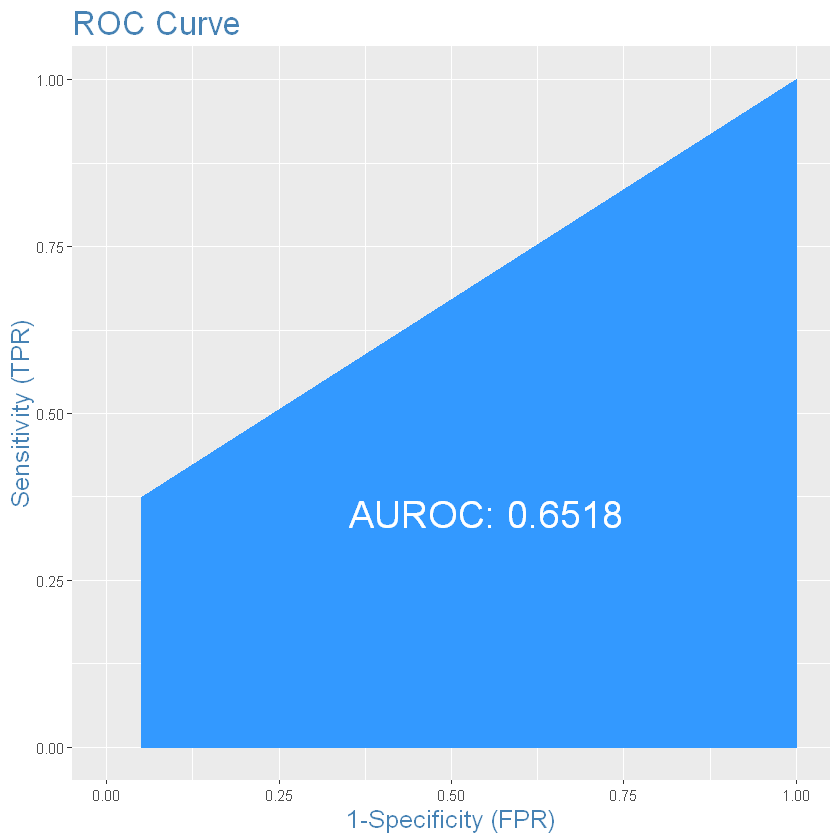

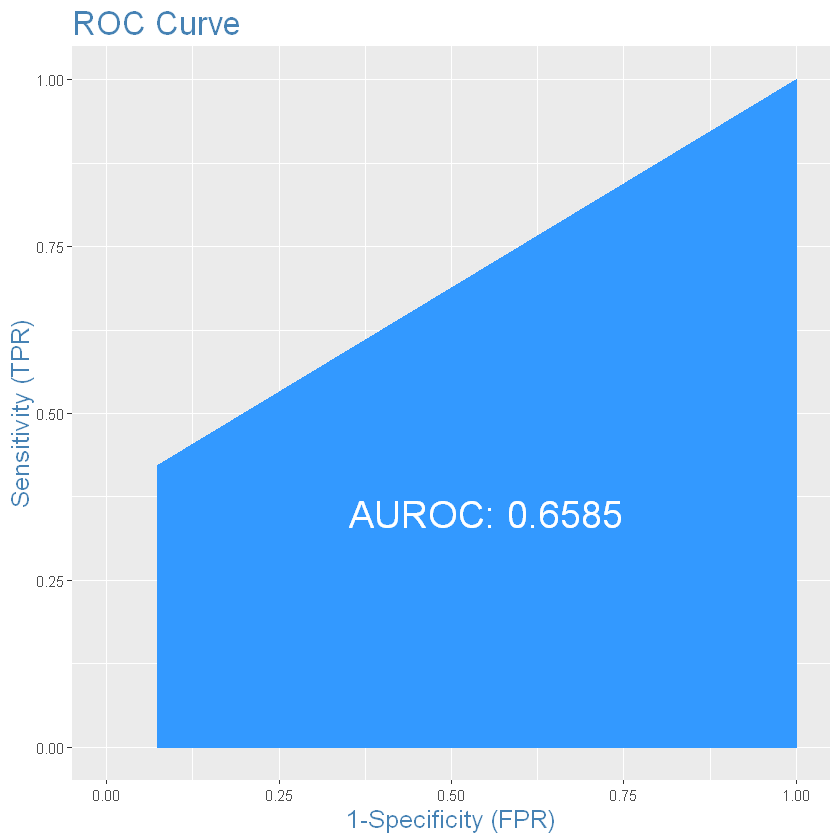

In [179]:
library(neuralnet)
library(InformationValue)
library(caret)
set.seed(1234)
#all variables
nnModel <- nnet(default_payment_next_month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6, data = train.data.norm, size = 1, maxit = 1000, decay = 0.08)

#Get accuracy
train.pred <- predict(nnModel, train.data.norm)
optcut <-optimalCutoff(train.data.norm$default_payment_next_month, train.pred, optimiseFor = "misclasserror")
train.binpred <- ifelse(train.pred < optcut, 0, 1)
con_train <- as.matrix(table(train.data.norm$default_payment_next_month,train.binpred))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
meanacc_train
precision_train <- con_train[4]/(con_train[4]+con_train[2])
recall_train <- con_train[4]/(con_train[4]+con_train[3])
f1_train <- 2*((precision_train*recall_train)/(precision_train+recall_train))
f1_train

test.pred <- predict(nnModel, test.data.norm)
optcut <-optimalCutoff(test.data.norm$default_payment_next_month, test.pred, optimiseFor = "misclasserror")
test.binpred <- ifelse(test.pred < optcut, 0, 1)
con_test <- as.matrix(table(test.data$default_payment_next_month, test.binpred))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
meanacc_test

precision_test <- con_test[4]/(con_test[4]+con_test[2])
recall_test <- con_test[4]/(con_test[4]+con_test[3])
f1_test <- 2*((precision_test*recall_test)/(precision_test+recall_test))
f1_test

tp_train <- con_train[4]
tn_train <- con_train[1]
fp_train <- con_train[2]
fn_train <- con_train[3]

total_train <- con_train[4]+con_train[3]+con_train[2]+con_train[1]
po_train <- (con_train[4]+con_train[1])/total_train
pe_train <- (((tp_train+fn_train)/total_train)*((tp_train+fp_train)/total_train))+(((fn_train+tn_train)/total_train)*((fp_train+tn_train)/total_train))
kappa_train <- (po_train-pe_train)/(1-pe_train)
kappa_train

tp_test <- con_test[4]
tn_test <- con_test[1]
fp_test <- con_test[2]
fn_test <- con_test[3]

total_test <- tp_test+fn_test+fp_test+tn_test
po_test <- (tp_test+tn_test)/total_test
pe_test <- (((tp_test+fn_test)/total_test)*((tp_test+fp_test)/total_test))+(((fn_test+tn_test)/total_test)*((fp_test+tn_test)/total_test))
kappa_test <- (po_test-pe_test)/(1-pe_test)
kappa_test

#ROC 
plotROC(actuals=train.data.norm$default_payment_next_month,predictedScores=train.binpred)
plotROC(actuals=test.data.norm$default_payment_next_month,predictedScores=test.binpred)

# weights:  25
initial  value 12502.938605 
iter  10 value 10087.280085
iter  20 value 9878.187983
iter  30 value 9809.948992
iter  40 value 9806.446106
iter  50 value 9805.952903
iter  50 value 9805.952830
iter  50 value 9805.952830
final  value 9805.952830 
converged


   train.binpred
        0     1
  0 16600   932
  1  3066  1902

[1] 0.7576163

[1] 0.4875673

   test.binpred
       0    1
  0 5394  438
  1  959  709

[1] 0.733591

[1] 0.50373

[1] 0.3896654

[1] 0.3938774

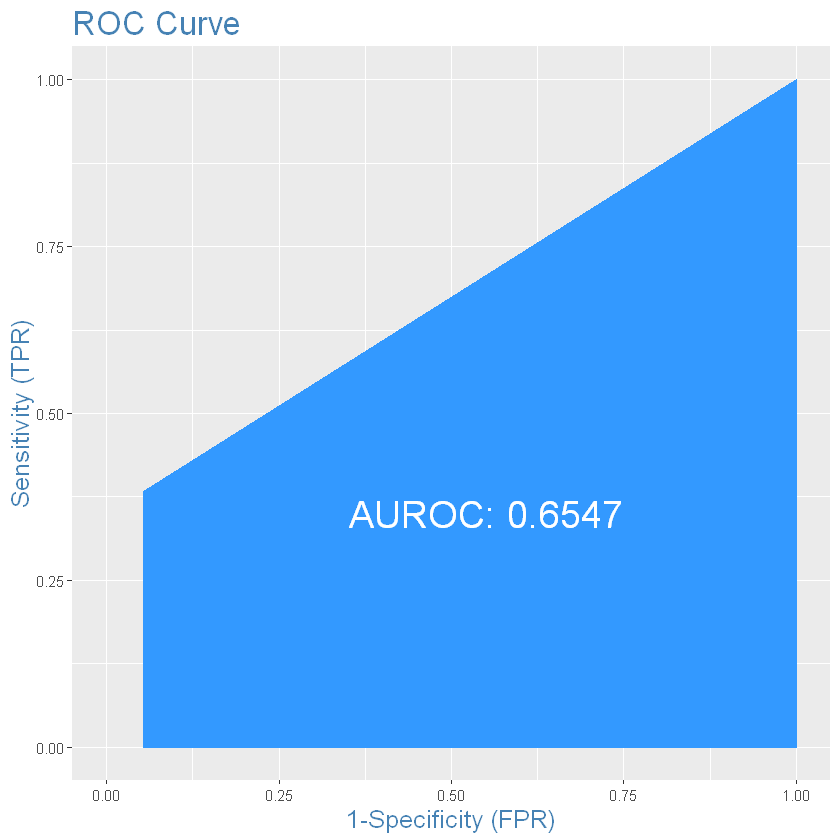

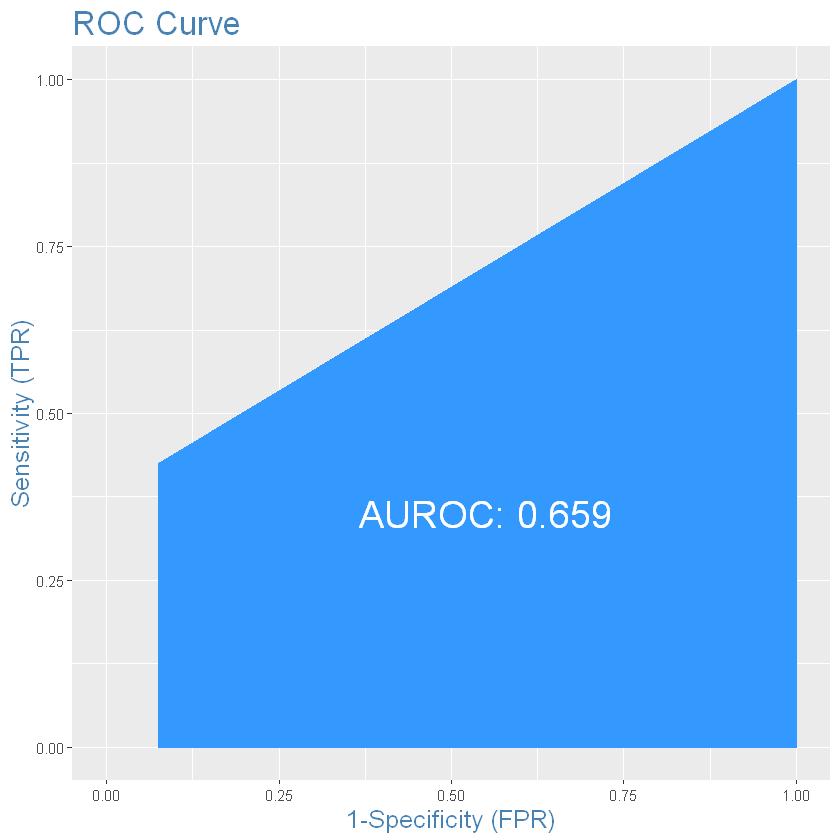

In [180]:
set.seed(1234)
#filter
nnModel <- nnet(default_payment_next_month ~ LIMIT_BAL+SEX+EDUCATION+MARRIAGE+
                    PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+
                    BILL_AMT1+BILL_AMT2+BILL_AMT3+
                    PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6, data = train.data.norm, size = 1, maxit = 1000, decay = 0.08)

#Get accuracy
train.pred <- predict(nnModel, train.data.norm)
optcut <-optimalCutoff(train.data.norm$default_payment_next_month, train.pred, optimiseFor = "misclasserror")
train.binpred <- ifelse(train.pred < optcut, 0, 1)
con_train <- as.matrix(table(train.data.norm$default_payment_next_month,train.binpred))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
meanacc_train
precision_train <- con_train[4]/(con_train[4]+con_train[2])
recall_train <- con_train[4]/(con_train[4]+con_train[3])
f1_train <- 2*((precision_train*recall_train)/(precision_train+recall_train))
f1_train

test.pred <- predict(nnModel, test.data.norm)
optcut <-optimalCutoff(test.data.norm$default_payment_next_month, test.pred, optimiseFor = "misclasserror")
test.binpred <- ifelse(test.pred < optcut, 0, 1)
con_test <- as.matrix(table(test.data$default_payment_next_month, test.binpred))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
meanacc_test

precision_test <- con_test[4]/(con_test[4]+con_test[2])
recall_test <- con_test[4]/(con_test[4]+con_test[3])
f1_test <- 2*((precision_test*recall_test)/(precision_test+recall_test))
f1_test

tp_train <- con_train[4]
tn_train <- con_train[1]
fp_train <- con_train[2]
fn_train <- con_train[3]

total_train <- con_train[4]+con_train[3]+con_train[2]+con_train[1]
po_train <- (con_train[4]+con_train[1])/total_train
pe_train <- (((tp_train+fn_train)/total_train)*((tp_train+fp_train)/total_train))+(((fn_train+tn_train)/total_train)*((fp_train+tn_train)/total_train))
kappa_train <- (po_train-pe_train)/(1-pe_train)
kappa_train

tp_test <- con_test[4]
tn_test <- con_test[1]
fp_test <- con_test[2]
fn_test <- con_test[3]

total_test <- tp_test+fn_test+fp_test+tn_test
po_test <- (tp_test+tn_test)/total_test
pe_test <- (((tp_test+fn_test)/total_test)*((tp_test+fp_test)/total_test))+(((fn_test+tn_test)/total_test)*((fp_test+tn_test)/total_test))
kappa_test <- (po_test-pe_test)/(1-pe_test)
kappa_test


#ROC 
plotROC(actuals=train.data.norm$default_payment_next_month,predictedScores=train.binpred)
plotROC(actuals=test.data.norm$default_payment_next_month,predictedScores=test.binpred)

# weights:  28
initial  value 20521.409533 
iter  10 value 11844.227187
iter  20 value 10288.424155
iter  30 value 10147.431373
iter  40 value 10073.886914
iter  50 value 10054.063850
iter  60 value 10046.524455
iter  70 value 9831.403767
iter  80 value 9816.811158
iter  90 value 9809.522949
final  value 9809.509877 
converged


   train.binpred
        0     1
  0 16685   847
  1  3151  1817

[1] 0.7616022

[1] 0.476153

   test.binpred
       0    1
  0 5411  421
  1  979  689

[1] 0.7337563

[1] 0.4960403

[1] 0.3806906

[1] 0.3871133

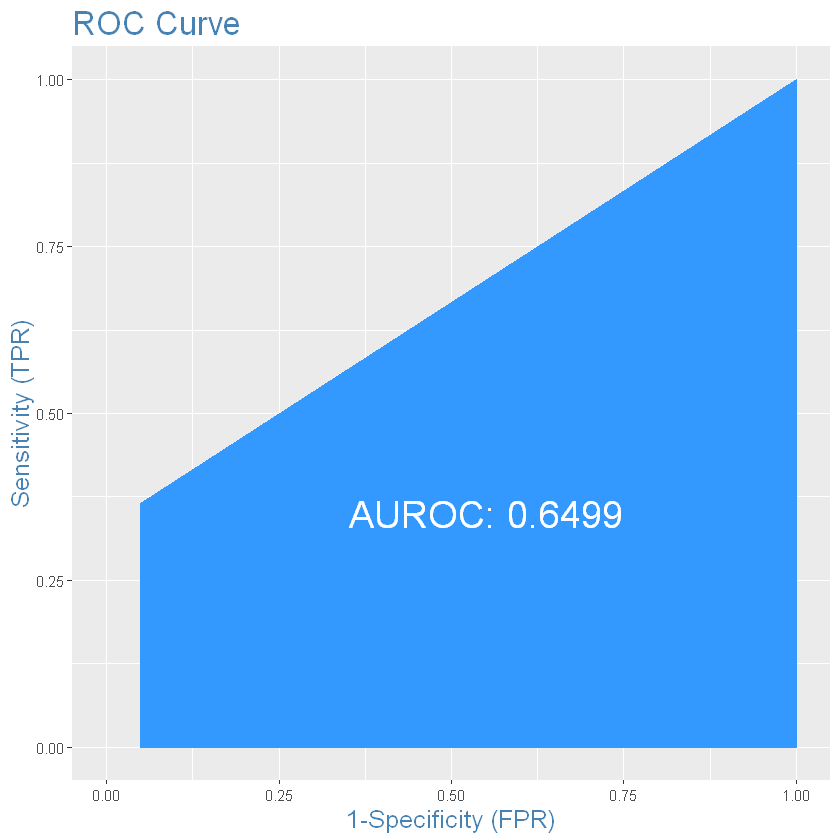

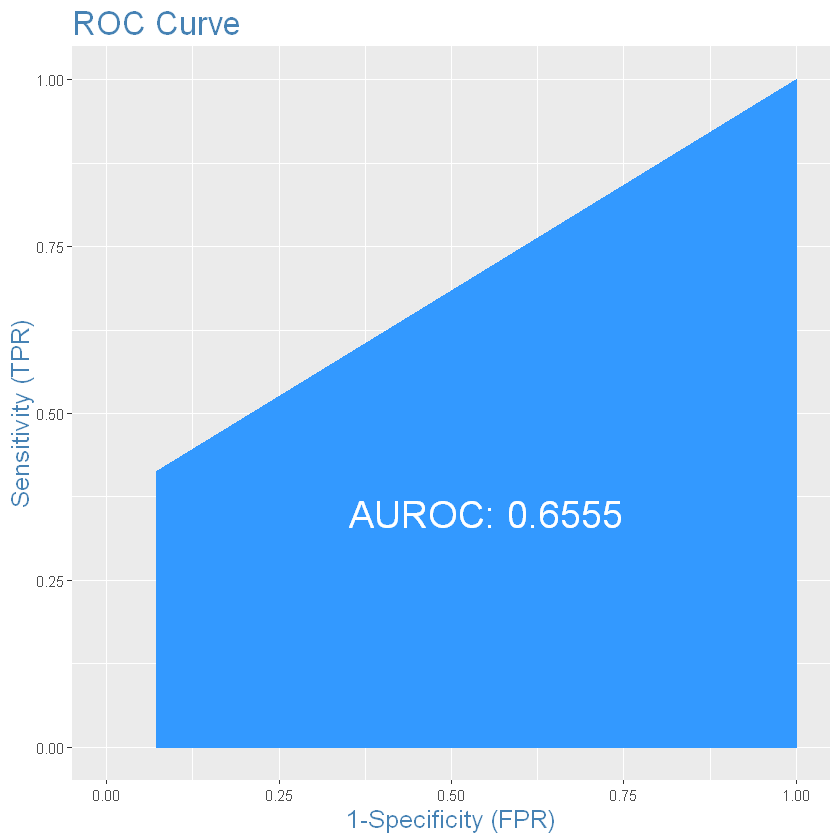

In [182]:
set.seed(1234)
#boruta 
nnModel <- nnet(default_payment_next_month ~ LIMIT_BAL+MARRIAGE+AGE+EDUCATION+
                    PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+
                    BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+
                    PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6, data = train.data.norm, size = 1, maxit = 1000, decay = 0.08)

#Get accuracy
train.pred <- predict(nnModel, train.data.norm)
optcut <-optimalCutoff(train.data.norm$default_payment_next_month, train.pred, optimiseFor = "misclasserror")
train.binpred <- ifelse(train.pred < optcut, 0, 1)
con_train <- as.matrix(table(train.data.norm$default_payment_next_month,train.binpred))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
meanacc_train
precision_train <- con_train[4]/(con_train[4]+con_train[2])
recall_train <- con_train[4]/(con_train[4]+con_train[3])
f1_train <- 2*((precision_train*recall_train)/(precision_train+recall_train))
f1_train

test.pred <- predict(nnModel, test.data.norm)
optcut <-optimalCutoff(test.data.norm$default_payment_next_month, test.pred, optimiseFor = "misclasserror")
test.binpred <- ifelse(test.pred < optcut, 0, 1)
con_test <- as.matrix(table(test.data$default_payment_next_month, test.binpred))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
meanacc_test

precision_test <- con_test[4]/(con_test[4]+con_test[2])
recall_test <- con_test[4]/(con_test[4]+con_test[3])
f1_test <- 2*((precision_test*recall_test)/(precision_test+recall_test))
f1_test

tp_train <- con_train[4]
tn_train <- con_train[1]
fp_train <- con_train[2]
fn_train <- con_train[3]

total_train <- con_train[4]+con_train[3]+con_train[2]+con_train[1]
po_train <- (con_train[4]+con_train[1])/total_train
pe_train <- (((tp_train+fn_train)/total_train)*((tp_train+fp_train)/total_train))+(((fn_train+tn_train)/total_train)*((fp_train+tn_train)/total_train))
kappa_train <- (po_train-pe_train)/(1-pe_train)
kappa_train

tp_test <- con_test[4]
tn_test <- con_test[1]
fp_test <- con_test[2]
fn_test <- con_test[3]

total_test <- tp_test+fn_test+fp_test+tn_test
po_test <- (tp_test+tn_test)/total_test
pe_test <- (((tp_test+fn_test)/total_test)*((tp_test+fp_test)/total_test))+(((fn_test+tn_test)/total_test)*((fp_test+tn_test)/total_test))
kappa_test <- (po_test-pe_test)/(1-pe_test)
kappa_test

#ROC 
plotROC(actuals=train.data.norm$default_payment_next_month,predictedScores=train.binpred)
plotROC(actuals=test.data.norm$default_payment_next_month,predictedScores=test.binpred)

# weights:  19
initial  value 12399.517082 
iter  10 value 10390.426946
iter  20 value 10214.901977
iter  30 value 10111.658943
iter  40 value 10066.494783
iter  50 value 9885.737332
iter  60 value 9851.466285
iter  70 value 9837.121206
iter  80 value 9836.522805
final  value 9836.522480 
converged


   train.binpred
        0     1
  0 16534   998
  1  3021  1947

[1] 0.7533166

[1] 0.4921016

   test.binpred
       0    1
  0 5452  380
  1 1013  655

[1] 0.7380802

[1] 0.4846467

[1] 0.3922106

[1] 0.3788548

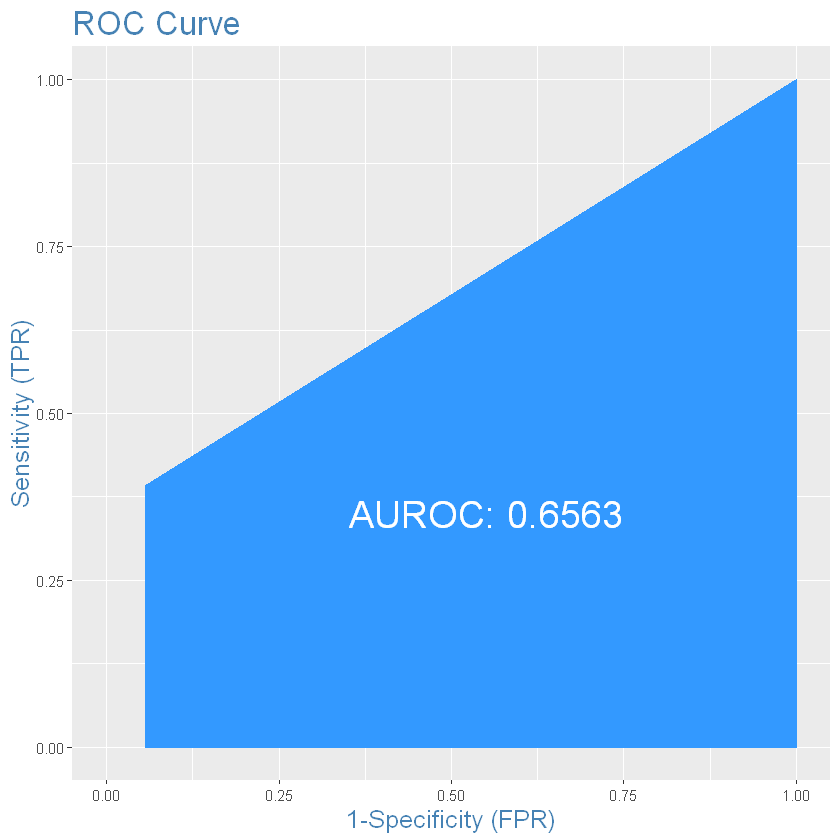

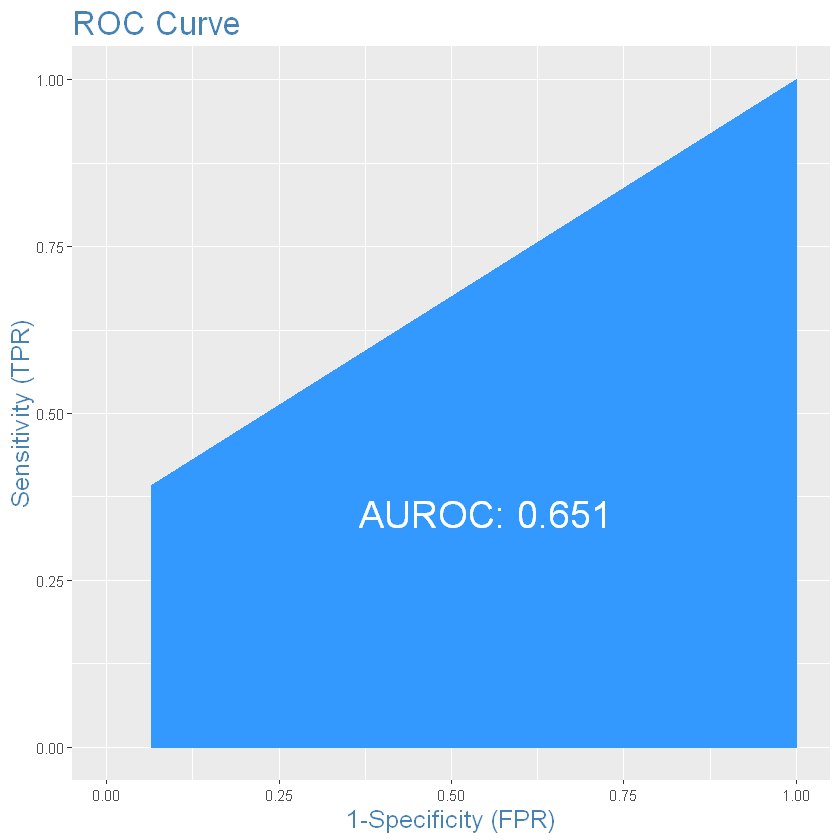

In [183]:
set.seed(1234)
#AIC
nnModel <- nnet(default_payment_next_month ~ LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+
                    PAY_0+PAY_2+PAY_3+PAY_5+
                    BILL_AMT2+BILL_AMT5+
                    PAY_AMT1+PAY_AMT2, data = train.data.norm, size = 1, maxit = 1000, decay = 0.08)

#Get accuracy
train.pred <- predict(nnModel, train.data.norm)
optcut <-optimalCutoff(train.data.norm$default_payment_next_month, train.pred, optimiseFor = "misclasserror")
train.binpred <- ifelse(train.pred < optcut, 0, 1)
con_train <- as.matrix(table(train.data.norm$default_payment_next_month,train.binpred))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
meanacc_train
precision_train <- con_train[4]/(con_train[4]+con_train[2])
recall_train <- con_train[4]/(con_train[4]+con_train[3])
f1_train <- 2*((precision_train*recall_train)/(precision_train+recall_train))
f1_train

test.pred <- predict(nnModel, test.data.norm)
optcut <-optimalCutoff(test.data.norm$default_payment_next_month, test.pred, optimiseFor = "misclasserror")
test.binpred <- ifelse(test.pred < optcut, 0, 1)
con_test <- as.matrix(table(test.data$default_payment_next_month, test.binpred))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
meanacc_test

precision_test <- con_test[4]/(con_test[4]+con_test[2])
recall_test <- con_test[4]/(con_test[4]+con_test[3])
f1_test <- 2*((precision_test*recall_test)/(precision_test+recall_test))
f1_test

tp_train <- con_train[4]
tn_train <- con_train[1]
fp_train <- con_train[2]
fn_train <- con_train[3]

total_train <- con_train[4]+con_train[3]+con_train[2]+con_train[1]
po_train <- (con_train[4]+con_train[1])/total_train
pe_train <- (((tp_train+fn_train)/total_train)*((tp_train+fp_train)/total_train))+(((fn_train+tn_train)/total_train)*((fp_train+tn_train)/total_train))
kappa_train <- (po_train-pe_train)/(1-pe_train)
kappa_train

tp_test <- con_test[4]
tn_test <- con_test[1]
fp_test <- con_test[2]
fn_test <- con_test[3]

total_test <- tp_test+fn_test+fp_test+tn_test
po_test <- (tp_test+tn_test)/total_test
pe_test <- (((tp_test+fn_test)/total_test)*((tp_test+fp_test)/total_test))+(((fn_test+tn_test)/total_test)*((fp_test+tn_test)/total_test))
kappa_test <- (po_test-pe_test)/(1-pe_test)
kappa_test

#ROC 
plotROC(actuals=train.data.norm$default_payment_next_month,predictedScores=train.binpred)
plotROC(actuals=test.data.norm$default_payment_next_month,predictedScores=test.binpred)

# weights:  24
initial  value 11918.461199 
iter  10 value 11550.625807
iter  20 value 10656.733345
iter  30 value 10325.284249
iter  40 value 10065.651322
iter  50 value 9948.839923
iter  60 value 9853.911843
iter  70 value 9813.016972
iter  80 value 9807.688187
final  value 9807.270448 
converged


   train.binpred
        0     1
  0 16596   936
  1  3065  1903

[1] 0.757207

[1] 0.4875112

   test.binpred
       0    1
  0 5402  430
  1  964  704

[1] 0.7346909

[1] 0.5024982

[1] 0.3894677

[1] 0.3932791

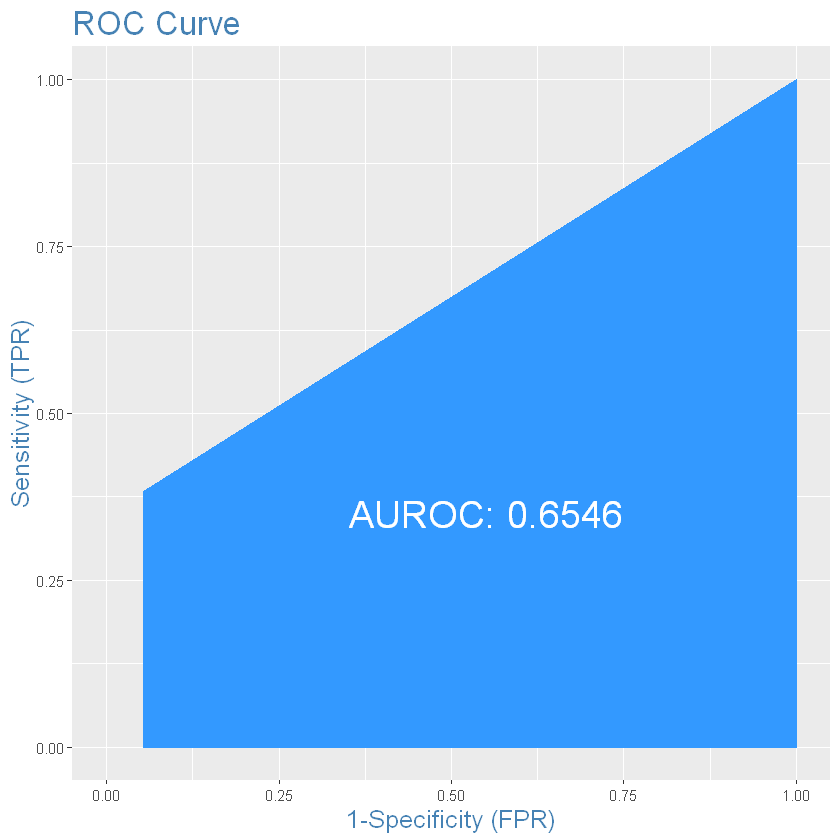

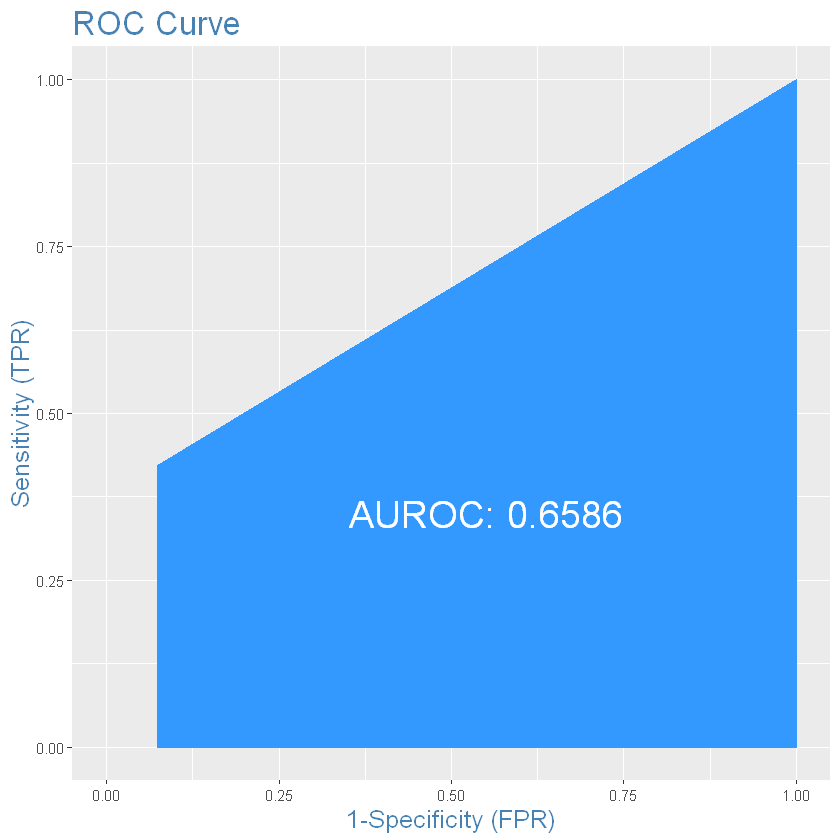

In [184]:
set.seed(1234)
#lasso
nnModel <- nnet(default_payment_next_month ~ LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+
                    PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+
                    BILL_AMT1+
                    PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6, data = train.data.norm, size = 1, maxit = 1000, decay = 0.08)

#Get accuracy
train.pred <- predict(nnModel, train.data.norm)
optcut <-optimalCutoff(train.data.norm$default_payment_next_month, train.pred, optimiseFor = "misclasserror")
train.binpred <- ifelse(train.pred < optcut, 0, 1)
con_train <- as.matrix(table(train.data.norm$default_payment_next_month,train.binpred))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
meanacc_train
precision_train <- con_train[4]/(con_train[4]+con_train[2])
recall_train <- con_train[4]/(con_train[4]+con_train[3])
f1_train <- 2*((precision_train*recall_train)/(precision_train+recall_train))
f1_train

test.pred <- predict(nnModel, test.data.norm)
optcut <-optimalCutoff(test.data.norm$default_payment_next_month, test.pred, optimiseFor = "misclasserror")
test.binpred <- ifelse(test.pred < optcut, 0, 1)
con_test <- as.matrix(table(test.data$default_payment_next_month, test.binpred))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
meanacc_test

precision_test <- con_test[4]/(con_test[4]+con_test[2])
recall_test <- con_test[4]/(con_test[4]+con_test[3])
f1_test <- 2*((precision_test*recall_test)/(precision_test+recall_test))
f1_test

tp_train <- con_train[4]
tn_train <- con_train[1]
fp_train <- con_train[2]
fn_train <- con_train[3]

total_train <- con_train[4]+con_train[3]+con_train[2]+con_train[1]
po_train <- (con_train[4]+con_train[1])/total_train
pe_train <- (((tp_train+fn_train)/total_train)*((tp_train+fp_train)/total_train))+(((fn_train+tn_train)/total_train)*((fp_train+tn_train)/total_train))
kappa_train <- (po_train-pe_train)/(1-pe_train)
kappa_train

tp_test <- con_test[4]
tn_test <- con_test[1]
fp_test <- con_test[2]
fn_test <- con_test[3]

total_test <- tp_test+fn_test+fp_test+tn_test
po_test <- (tp_test+tn_test)/total_test
pe_test <- (((tp_test+fn_test)/total_test)*((tp_test+fp_test)/total_test))+(((fn_test+tn_test)/total_test)*((fp_test+tn_test)/total_test))
kappa_test <- (po_test-pe_test)/(1-pe_test)
kappa_test

#ROC 
plotROC(actuals=train.data.norm$default_payment_next_month,predictedScores=train.binpred)
plotROC(actuals=test.data.norm$default_payment_next_month,predictedScores=test.binpred)

# weights:  12
initial  value 17999.142666 
iter  10 value 11878.582140
iter  20 value 11878.509315
iter  30 value 11779.900959
iter  40 value 10250.287815
iter  50 value 10059.640601
final  value 10058.956612 
converged


   train.binpred
        0     1
  0 16790   742
  1  3283  1685

[1] 0.7653599

[1] 0.4557133

   test.binpred
       0    1
  0 5574  258
  1 1137  531

[1] 0.7517902

[1] 0.4322344

[1] 0.3634589

[1] 0.3376234

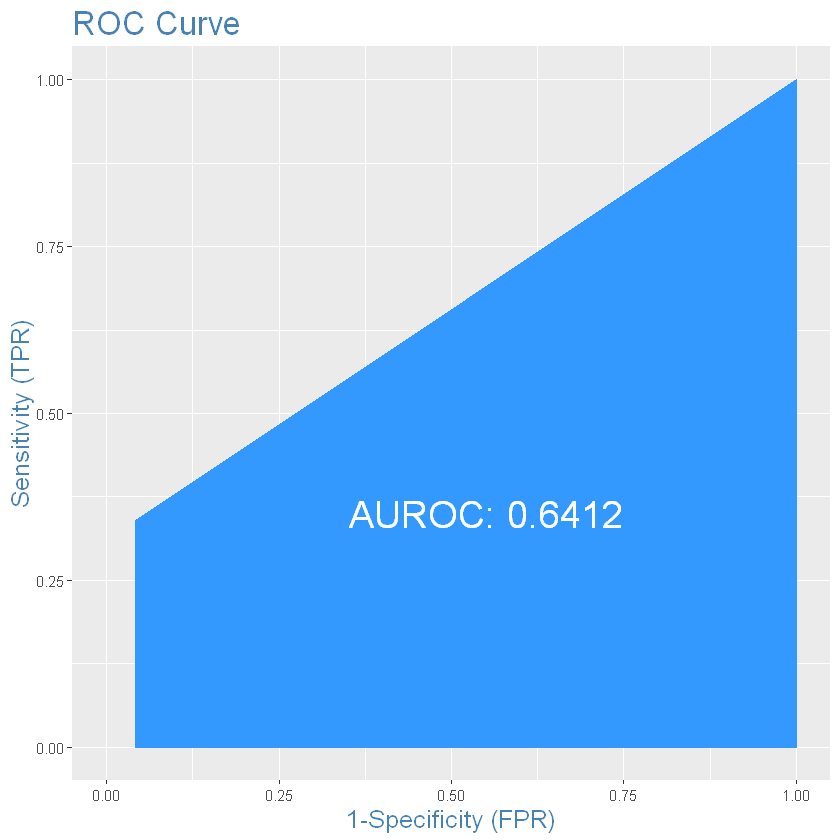

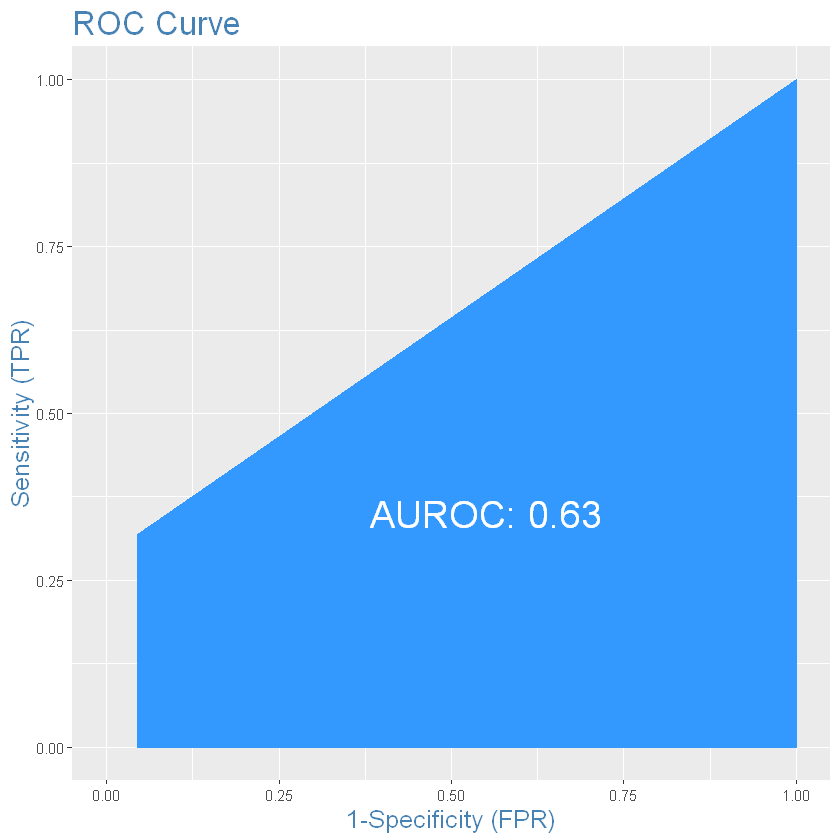

In [185]:
set.seed(1234)
#rf
nnModel <- nnet(default_payment_next_month ~ LIMIT_BAL+AGE+
                    PAY_0+
                    BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT4+BILL_AMT5+BILL_AMT6, data = train.data.norm, size = 1, maxit = 1000, decay = 0.08)

#Get accuracy
train.pred <- predict(nnModel, train.data.norm)
optcut <-optimalCutoff(train.data.norm$default_payment_next_month, train.pred, optimiseFor = "misclasserror")
train.binpred <- ifelse(train.pred < optcut, 0, 1)
con_train <- as.matrix(table(train.data.norm$default_payment_next_month,train.binpred))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
meanacc_train
precision_train <- con_train[4]/(con_train[4]+con_train[2])
recall_train <- con_train[4]/(con_train[4]+con_train[3])
f1_train <- 2*((precision_train*recall_train)/(precision_train+recall_train))
f1_train

test.pred <- predict(nnModel, test.data.norm)
optcut <-optimalCutoff(test.data.norm$default_payment_next_month, test.pred, optimiseFor = "misclasserror")
test.binpred <- ifelse(test.pred < optcut, 0, 1)
con_test <- as.matrix(table(test.data$default_payment_next_month, test.binpred))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
meanacc_test

precision_test <- con_test[4]/(con_test[4]+con_test[2])
recall_test <- con_test[4]/(con_test[4]+con_test[3])
f1_test <- 2*((precision_test*recall_test)/(precision_test+recall_test))
f1_test

tp_train <- con_train[4]
tn_train <- con_train[1]
fp_train <- con_train[2]
fn_train <- con_train[3]

total_train <- con_train[4]+con_train[3]+con_train[2]+con_train[1]
po_train <- (con_train[4]+con_train[1])/total_train
pe_train <- (((tp_train+fn_train)/total_train)*((tp_train+fp_train)/total_train))+(((fn_train+tn_train)/total_train)*((fp_train+tn_train)/total_train))
kappa_train <- (po_train-pe_train)/(1-pe_train)
kappa_train

tp_test <- con_test[4]
tn_test <- con_test[1]
fp_test <- con_test[2]
fn_test <- con_test[3]

total_test <- tp_test+fn_test+fp_test+tn_test
po_test <- (tp_test+tn_test)/total_test
pe_test <- (((tp_test+fn_test)/total_test)*((tp_test+fp_test)/total_test))+(((fn_test+tn_test)/total_test)*((fp_test+tn_test)/total_test))
kappa_test <- (po_test-pe_test)/(1-pe_test)
kappa_test

#ROC 
plotROC(actuals=train.data.norm$default_payment_next_month,predictedScores=train.binpred)
plotROC(actuals=test.data.norm$default_payment_next_month,predictedScores=test.binpred)

# 5.2 Naive Bayes Model

naivebayes 0.9.6 loaded
Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

   nb1.train
        0     1
  0 14499  3033
  1  2180  2788

[1] 0.7683111

[1] 0.6741261

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

[1] 0.7648

[1] 0.6712504

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

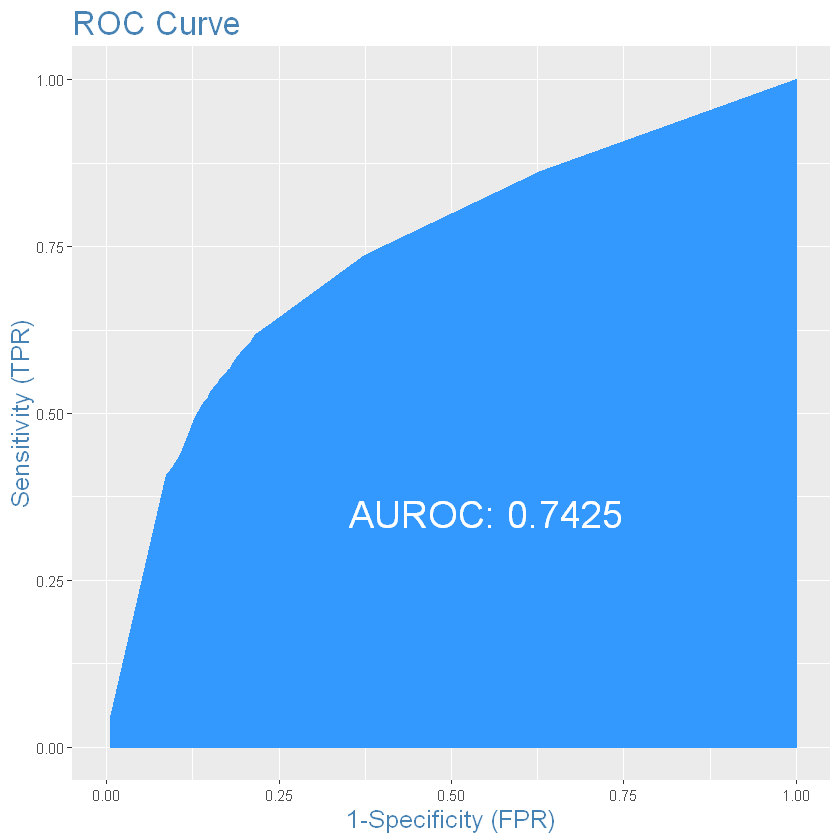

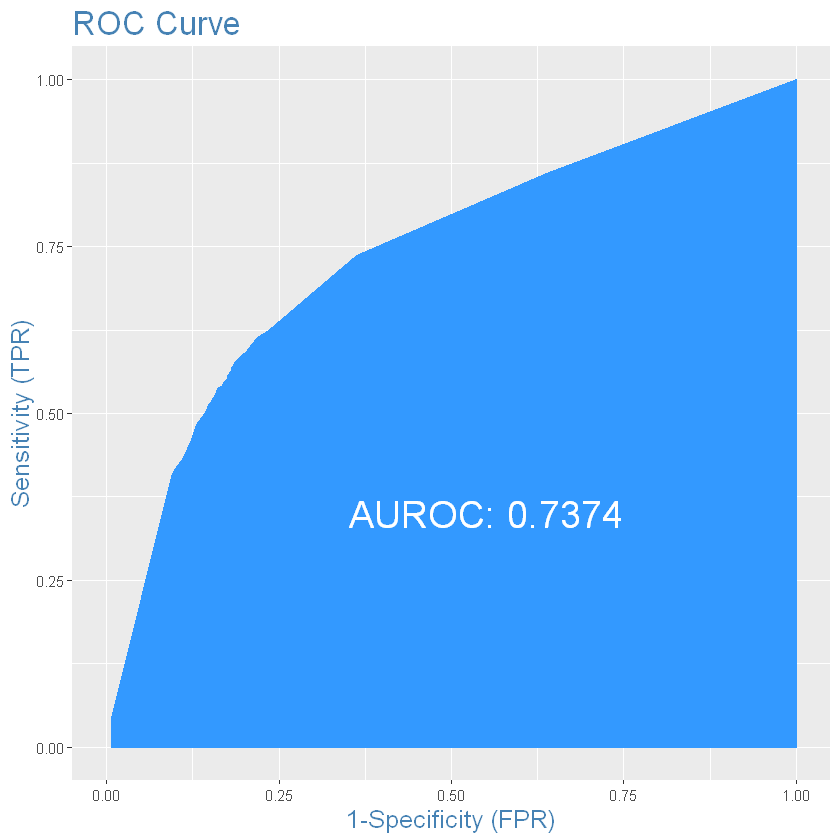

In [127]:
library(naivebayes)
# All Variables
nb1 <- naive_bayes(as.factor(default_payment_next_month) ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE 
      + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 
      + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 
      + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6, data = train.data.norm)

nb1.train <- predict(nb1, newdata = train.data.norm, type="class")
nb1.train.table = table(train.data.norm$default_payment_next_month, nb1.train)
nb1.train.table
mean(train.data.norm$default_payment_next_month == nb1.train) #0.7172
avg.class.train1 = (nb1.train.table[1,1]/(nb1.train.table[1,1] + nb1.train.table[2,1]) +
                     nb1.train.table[2,2]/(nb1.train.table[2,2] + nb1.train.table[1,2]))/2
avg.class.train1 #0.6451815

nb1.test <- predict(nb1, newdata = test.data.norm, type="class")
nb1.test.table = table(test.data.norm$default_payment_next_month, nb1.test)
mean(test.data.norm$default_payment_next_month == nb1.test) #0.7117333
avg.class.test1 = (nb1.test.table[1,1]/(nb1.test.table[1,1] + nb1.test.table[2,1]) +
                     nb1.test.table[2,2]/(nb1.test.table[2,2] + nb1.test.table[1,2]))/2
avg.class.test1 #0.641214

#ROC
nb1.probs.train <- predict(nb1, newdata = train.data.norm, type="prob")
nb1.probs.test <- predict(nb1, newdata = test.data.norm, type="prob")
plotROC(actual=train.data.norm$default_payment_next_month, predictedScores=nb1.probs.train[,2])
plotROC(actual=test.data.norm$default_payment_next_month, predictedScores=nb1.probs.test[,2])
#Train 0.7372, Test 0.7261

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

   nb2.train
        0     1
  0 14496  3036
  1  2175  2793

[1] 0.7684

[1] 0.6743449

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

[1] 0.7641333

[1] 0.6705054

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

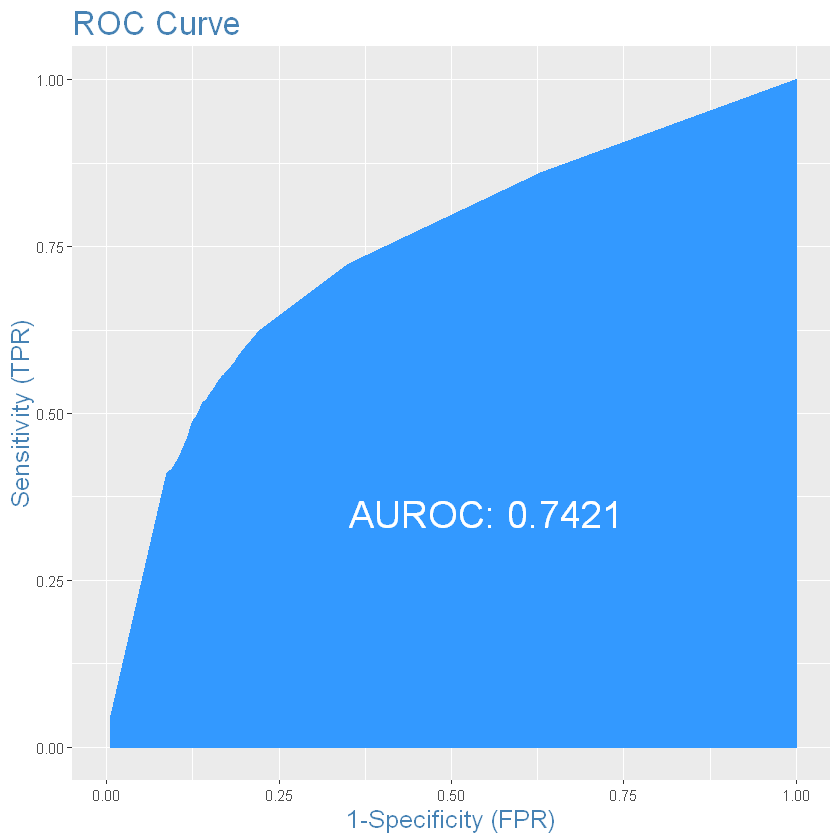

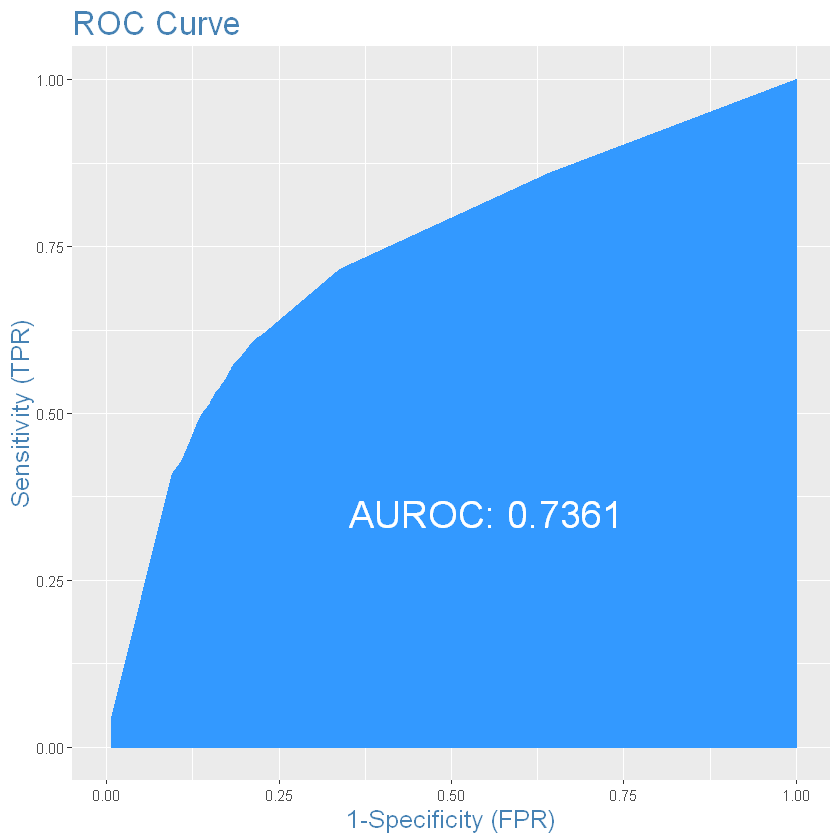

In [128]:
# Filter Variables
nb2 <- naive_bayes(as.factor(default_payment_next_month) ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE 
      + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 
      + BILL_AMT2 + BILL_AMT3 + PAY_AMT1  + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 
      + PAY_AMT5 + PAY_AMT6, data = train.data.norm)

nb2.train <- predict(nb2, newdata = train.data.norm, type="class")
nb2.train.table = table(train.data.norm$default_payment_next_month, nb2.train)
nb2.train.table
mean(train.data.norm$default_payment_next_month == nb2.train) #0.7298667
avg.class.train2 = (nb2.train.table[1,1]/(nb2.train.table[1,1] + nb2.train.table[2,1]) +
                     nb2.train.table[2,2]/(nb2.train.table[2,2] + nb2.train.table[1,2]))/2
avg.class.train2 #0.6521358

nb2.test <- predict(nb2, newdata = test.data.norm, type="class")
nb2.test.table = table(test.data.norm$default_payment_next_month, nb2.test)
mean(test.data.norm$default_payment_next_month == nb2.test) #0.7274667
avg.class.test2 = (nb2.test.table[1,1]/(nb2.test.table[1,1] + nb2.test.table[2,1]) +
                     nb2.test.table[2,2]/(nb2.test.table[2,2] + nb2.test.table[1,2]))/2
avg.class.test2 #0.6508479

#ROC
nb2.probs.train <- predict(nb2, newdata = train.data.norm, type="prob")
nb2.probs.test <- predict(nb2, newdata = test.data.norm, type="prob")
plotROC(actual=train.data.norm$default_payment_next_month, predictedScores=nb2.probs.train[,2])
plotROC(actual=test.data.norm$default_payment_next_month, predictedScores=nb2.probs.test[,2])
#Train 0.7372, Test 0.727

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

   nb3.train
        0     1
  0 14491  3041
  1  2182  2786

[1] 0.7678667

[1] 0.6736244

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

[1] 0.7642667

[1] 0.6706384

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

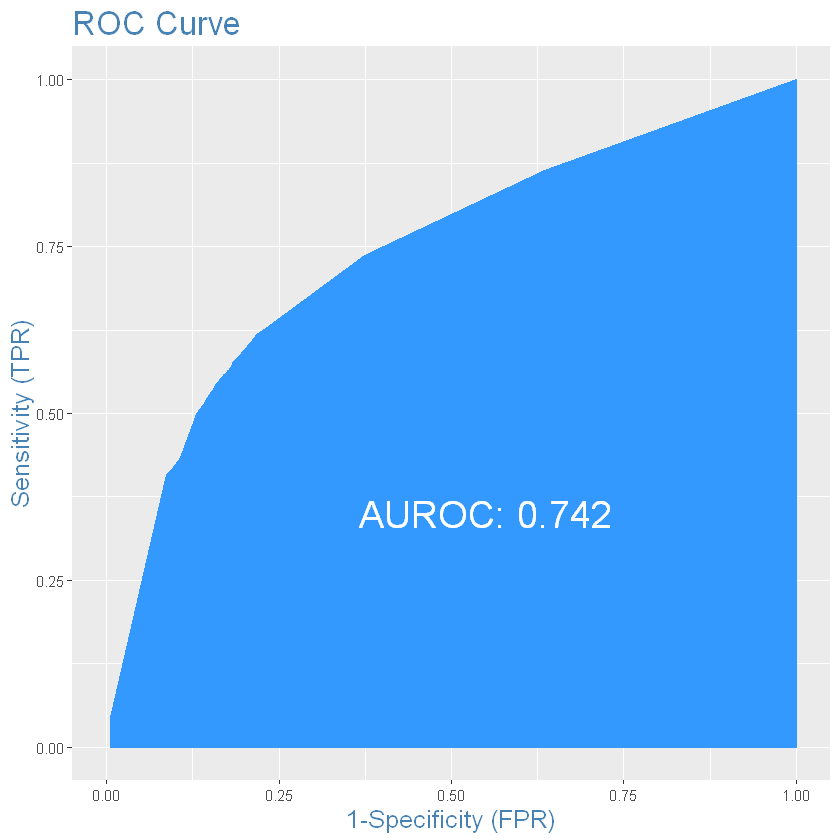

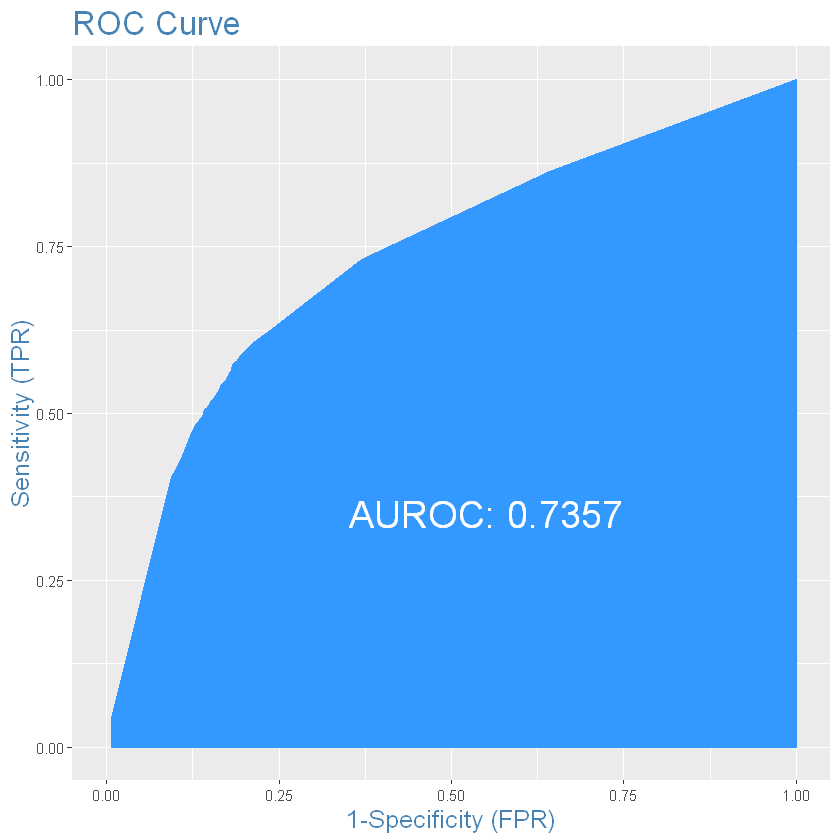

In [129]:
# Boruta
nb3 <- naive_bayes(as.factor(default_payment_next_month) ~ LIMIT_BAL + MARRIAGE 
      + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 
      + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 
      + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + EDUCATION, data = train.data.norm)

nb3.train <- predict(nb3, newdata = train.data.norm, type="class")
nb3.train.table = table(train.data.norm$default_payment_next_month, nb3.train)
nb3.train.table
mean(train.data.norm$default_payment_next_month == nb3.train) #0.7217778
avg.class.train3 = (nb3.train.table[1,1]/(nb3.train.table[1,1] + nb3.train.table[2,1]) +
                     nb3.train.table[2,2]/(nb3.train.table[2,2] + nb3.train.table[1,2]))/2
avg.class.train3 #0.6470664

nb3.test <- predict(nb3, newdata = test.data.norm, type="class")
nb3.test.table = table(test.data.norm$default_payment_next_month, nb3.test)
mean(test.data.norm$default_payment_next_month == nb3.test) #0.7162667
avg.class.test3 = (nb3.test.table[1,1]/(nb3.test.table[1,1] + nb3.test.table[2,1]) +
                     nb3.test.table[2,2]/(nb3.test.table[2,2] + nb3.test.table[1,2]))/2
avg.class.test3 #0.6416398

#ROC
nb3.probs.train <- predict(nb3, newdata = train.data.norm, type="prob")
nb3.probs.test <- predict(nb3, newdata = test.data.norm, type="prob")
plotROC(actual=train.data.norm$default_payment_next_month, predictedScores=nb3.probs.train[,2])
plotROC(actual=test.data.norm$default_payment_next_month, predictedScores=nb3.probs.test[,2])
#Train 0.7354, Test 0.7245

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

   nb4.train
        0     1
  0 14907  2625
  1  2268  2700

[1] 0.7825333

[1] 0.6874949

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

[1] 0.7806667

[1] 0.6861381

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

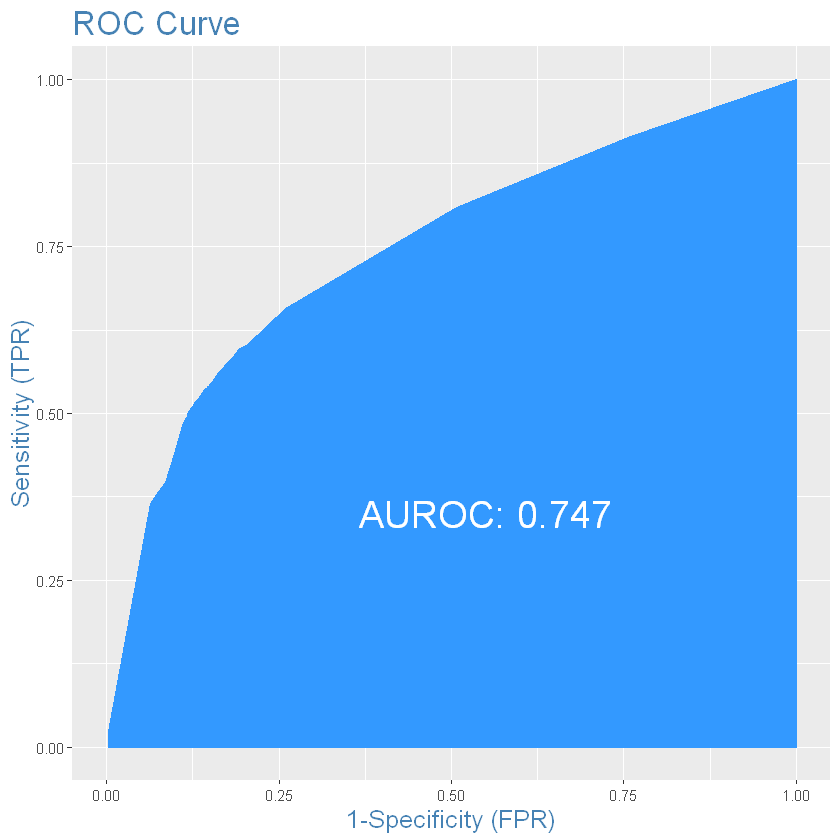

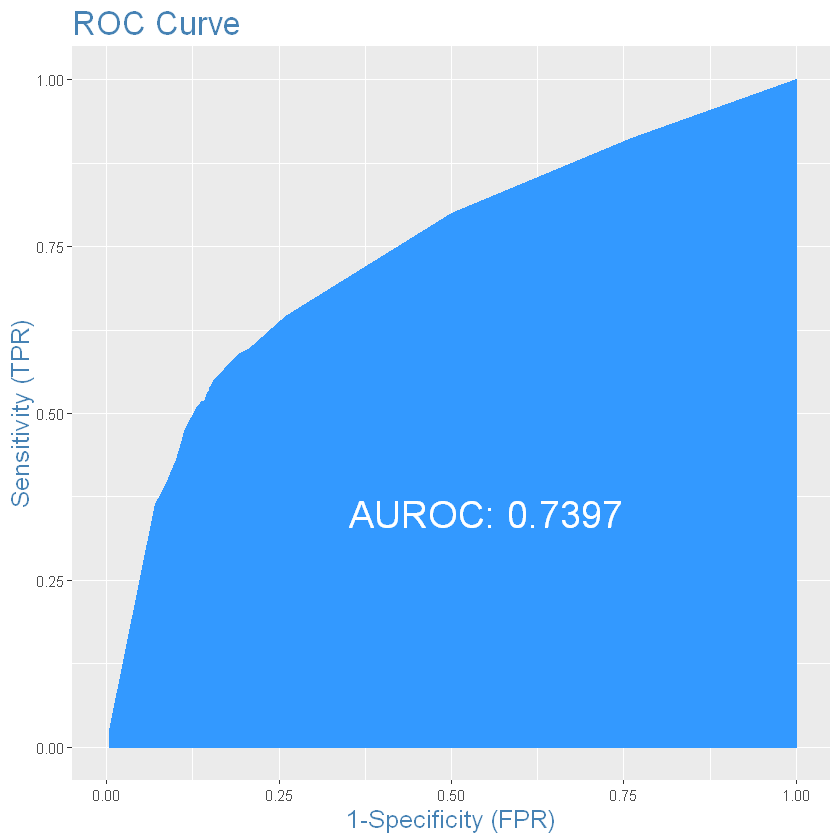

In [130]:
# Stepwise
nb4 <- naive_bayes(as.factor(default_payment_next_month) ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE 
      + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_5 + BILL_AMT2 + BILL_AMT5 + PAY_AMT1 + PAY_AMT2, data = train.data.norm)

nb4.train <- predict(nb4, newdata = train.data.norm, type="class")
nb4.train.table = table(train.data.norm$default_payment_next_month, nb4.train)
nb4.train.table
mean(train.data.norm$default_payment_next_month == nb4.train) #0.7748
avg.class.train4 = (nb4.train.table[1,1]/(nb4.train.table[1,1] + nb4.train.table[2,1]) +
                     nb4.train.table[2,2]/(nb4.train.table[2,2] + nb4.train.table[1,2]))/2
avg.class.train4 #0.6811844

nb4.test <- predict(nb4, newdata = test.data.norm, type="class")
nb4.test.table = table(test.data.norm$default_payment_next_month, nb4.test)
mean(test.data.norm$default_payment_next_month == nb4.test) #0.7730667
avg.class.test4 = (nb4.test.table[1,1]/(nb4.test.table[1,1] + nb4.test.table[2,1]) +
                     nb4.test.table[2,2]/(nb4.test.table[2,2] + nb4.test.table[1,2]))/2
avg.class.test4 #0.6791274

#ROC
nb4.probs.train <- predict(nb4, newdata = train.data.norm, type="prob")
nb4.probs.test <- predict(nb4, newdata = test.data.norm, type="prob")
plotROC(actual=train.data.norm$default_payment_next_month, predictedScores=nb4.probs.train[,2])
plotROC(actual=test.data.norm$default_payment_next_month, predictedScores=nb4.probs.test[,2])
#Train 0.742, Test 0.7305

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

   nb5.train
        0     1
  0 14496  3036
  1  2169  2799

[1] 0.7686667

[1] 0.6747693

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

[1] 0.7650667

[1] 0.6716745

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

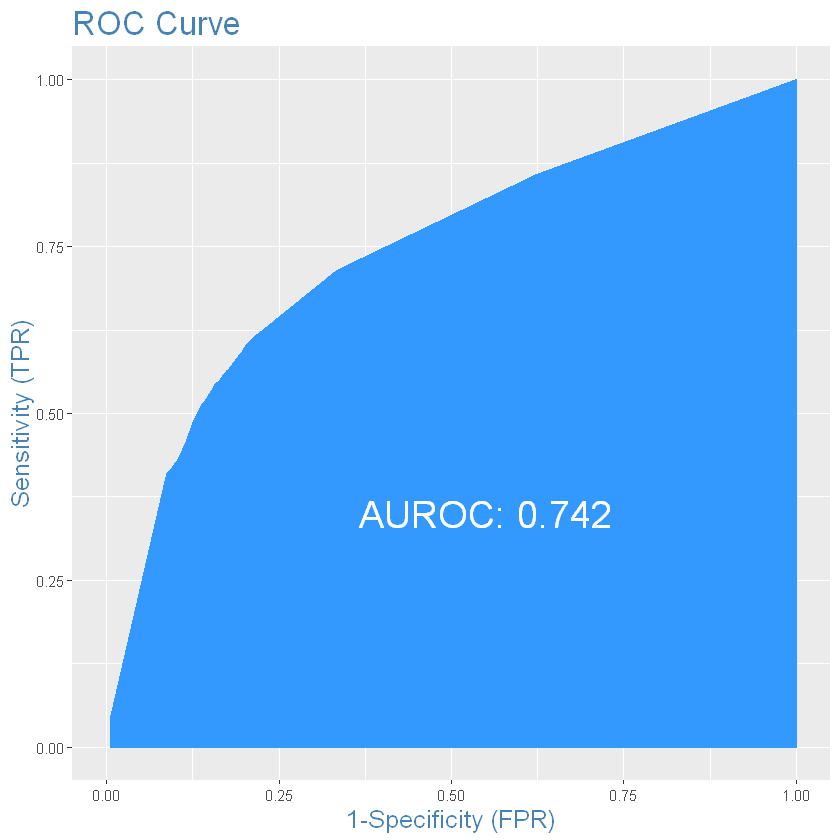

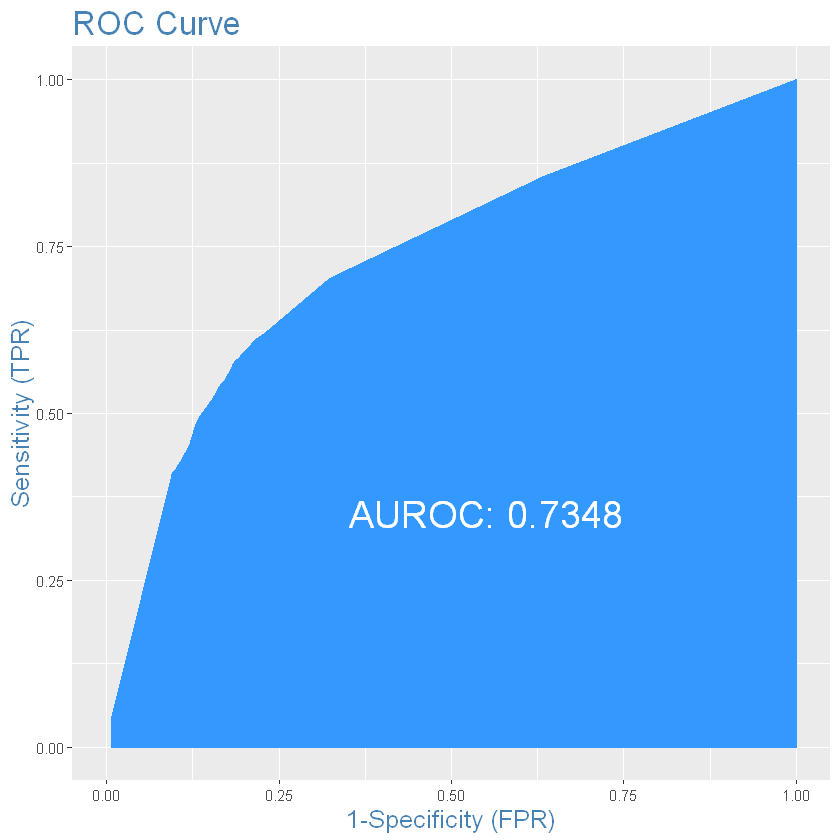

In [131]:
# Lasso
nb5 <- naive_bayes(as.factor(default_payment_next_month) ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE 
      + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + PAY_AMT1 
      + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6, data = train.data.norm)

nb5.train <- predict(nb5, newdata = train.data.norm, type="class")
nb5.train.table = table(train.data.norm$default_payment_next_month, nb5.train)
nb5.train.table
mean(train.data.norm$default_payment_next_month == nb5.train) #0.7312444
avg.class.train5 = (nb5.train.table[1,1]/(nb5.train.table[1,1] + nb5.train.table[2,1]) +
                     nb5.train.table[2,2]/(nb5.train.table[2,2] + nb5.train.table[1,2]))/2
avg.class.train5 #0.6527333

nb5.test <- predict(nb5, newdata = test.data.norm, type="class")
nb5.test.table = table(test.data.norm$default_payment_next_month, nb5.test)
mean(test.data.norm$default_payment_next_month == nb5.test) #0.7282667
avg.class.test5 = (nb5.test.table[1,1]/(nb5.test.table[1,1] + nb5.test.table[2,1]) +
                     nb5.test.table[2,2]/(nb5.test.table[2,2] + nb5.test.table[1,2]))/2
avg.class.test5 #0.6504876

#ROC
nb5.probs.train <- predict(nb5, newdata = train.data.norm, type="prob")
nb5.probs.test <- predict(nb5, newdata = test.data.norm, type="prob")
plotROC(actual=train.data.norm$default_payment_next_month, predictedScores=nb5.probs.train[,2])
plotROC(actual=test.data.norm$default_payment_next_month, predictedScores=nb5.probs.test[,2])
#Train 0.7379, Test 0.7277

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

   nb6.train
        0     1
  0 16072  1460
  1  2826  2142

[1] 0.8095111

[1] 0.722565

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

[1] 0.8012

[1] 0.7090434

Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."Warning message:
"predict.naive_bayes(): More features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

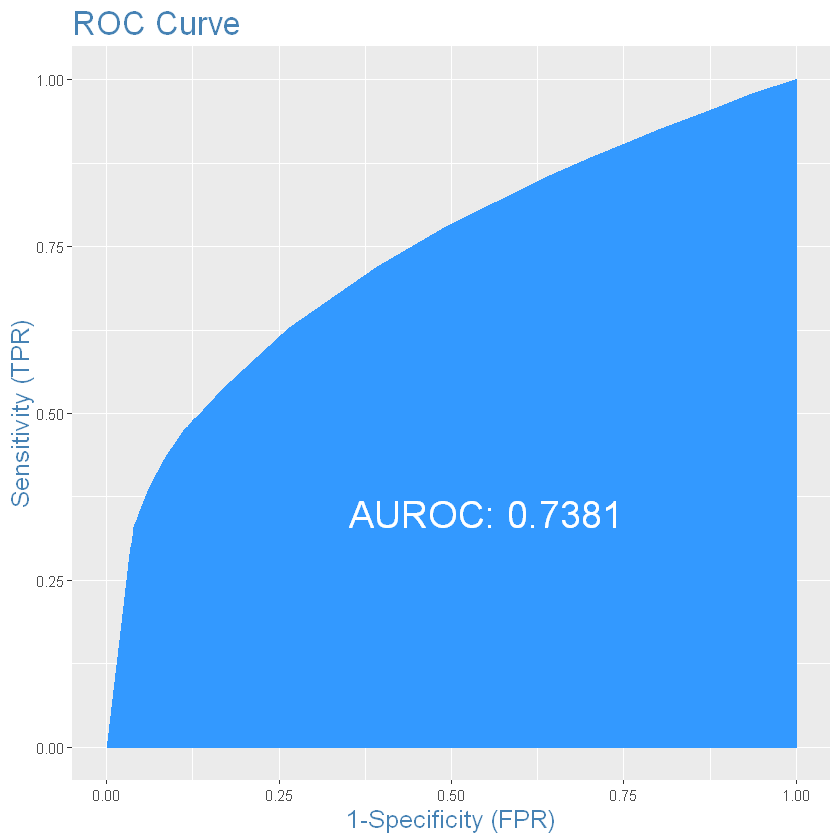

[1] 0.4998833

[1] 0.4881565

[1] 0.3859033

[1] 0.3680125

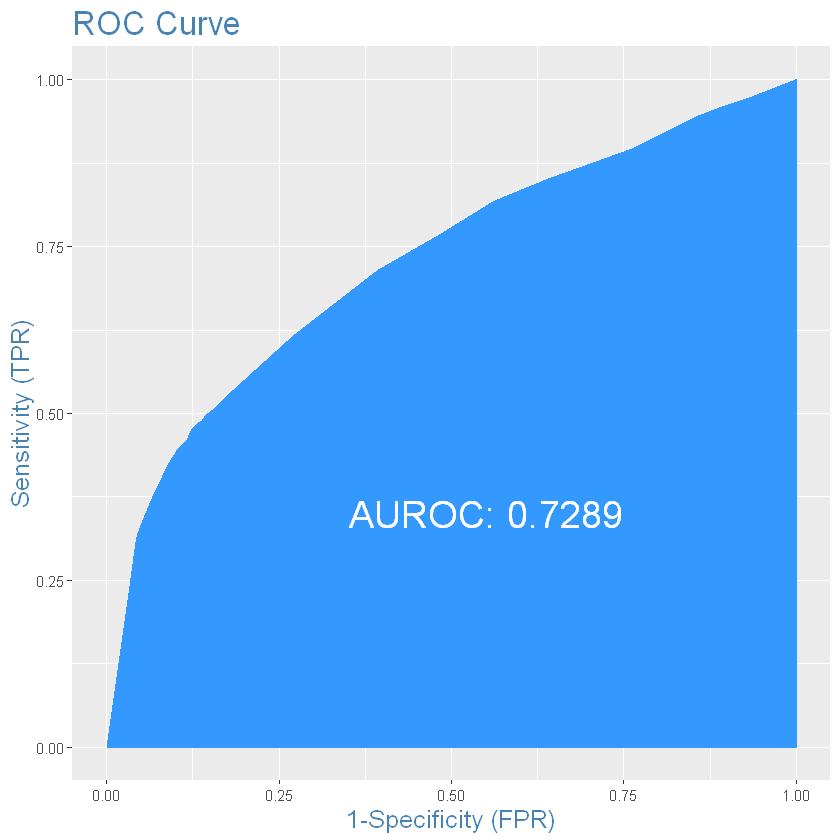

In [157]:
# Random Forest
nb6 <- naive_bayes(as.factor(default_payment_next_month) ~ PAY_0 + BILL_AMT1 + AGE + BILL_AMT2 + LIMIT_BAL 
                   + BILL_AMT3 + PAY_AMT1 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6, data = train.data.norm)

nb6.train <- predict(nb6, newdata = train.data.norm, type="class")
nb6.train.table = table(train.data.norm$default_payment_next_month, nb6.train)
nb6.train.table
mean(train.data.norm$default_payment_next_month == nb6.train) #0.82
avg.class.train6 = (nb6.train.table[1,1]/(nb6.train.table[1,1] + nb6.train.table[2,1]) +
                     nb6.train.table[2,2]/(nb6.train.table[2,2] + nb6.train.table[1,2]))/2
avg.class.train6 #0.7683703

nb6.test <- predict(nb6, newdata = test.data.norm, type="class")
nb6.test.table = table(test.data.norm$default_payment_next_month, nb6.test)
mean(test.data.norm$default_payment_next_month == nb6.test) #0.8128
avg.class.test6 = (nb6.test.table[1,1]/(nb6.test.table[1,1] + nb6.test.table[2,1]) +
                     nb6.test.table[2,2]/(nb6.test.table[2,2] + nb6.test.table[1,2]))/2
avg.class.test6 #0.7518146

#ROC
nb6.probs.train <- predict(nb6, newdata = train.data.norm, type="prob")
nb6.probs.test <- predict(nb6, newdata = test.data.norm, type="prob")
plotROC(actual=train.data.norm$default_payment_next_month, predictedScores=nb6.probs.train[,2])
plotROC(actual=test.data.norm$default_payment_next_month, predictedScores=nb6.probs.test[,2])
#Train 0.7244, Test 0.7174
precision = nb6.train.table[2,2]/(nb6.train.table[2,2] + nb6.train.table[1,2])
recall =  nb6.train.table[2,2]/(nb6.train.table[2,2] + nb6.train.table[2,1])
f1score = 2*precision*recall/(precision + recall)
f1score

precision = nb6.test.table[2,2]/(nb6.test.table[2,2] + nb6.test.table[1,2])
recall =  nb6.test.table[2,2]/(nb6.test.table[2,2] + nb6.test.table[2,1])
f1score = 2*precision*recall/(precision + recall)
f1score

#kappa code
con_train <- as.matrix(table(prediction = nb6.train, actual = train.data.norm$default_payment_next_month))

con_test <- as.matrix(table(prediction = nb6.test, actual = test.data.norm$default_payment_next_month))

tp_train <- con_train[4]
tn_train <- con_train[1]
fp_train <- con_train[2]
fn_train <- con_train[3]

total_train <- con_train[4]+con_train[3]+con_train[2]+con_train[1]
po_train <- (con_train[4]+con_train[1])/total_train
pe_train <- (((tp_train+fn_train)/total_train)*((tp_train+fp_train)/total_train))+(((fn_train+tn_train)/total_train)*((fp_train+tn_train)/total_train))
kappa_train <- (po_train-pe_train)/(1-pe_train)
kappa_train

tp_test <- con_test[4]
tn_test <- con_test[1]
fp_test <- con_test[2]
fn_test <- con_test[3]

total_test <- tp_test+fn_test+fp_test+tn_test
po_test <- (tp_test+tn_test)/total_test
pe_test <- (((tp_test+fn_test)/total_test)*((tp_test+fp_test)/total_test))+(((fn_test+tn_test)/total_test)*((fp_test+tn_test)/total_test))
kappa_test <- (po_test-pe_test)/(1-pe_test)
kappa_test

# 5.3 Logistic Regression Model

,0,1
0,16586,3045
1,946,1923


[1] 82.26

[1] 75.75783

,0,1
0,5461,1037
1,371,631


[1] 81.23

[1] 73.50765

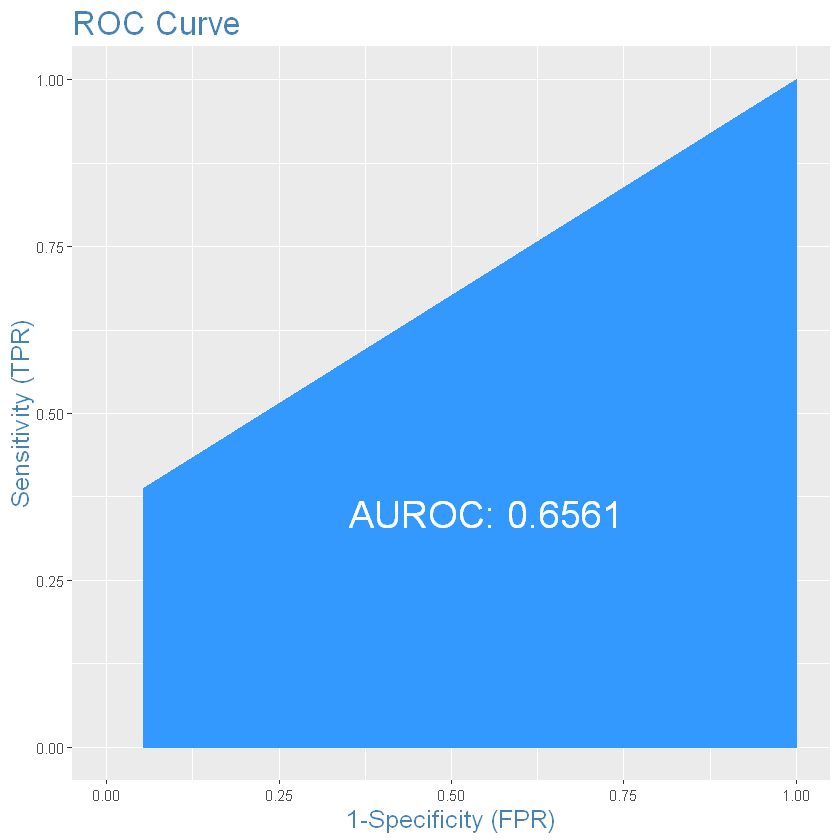

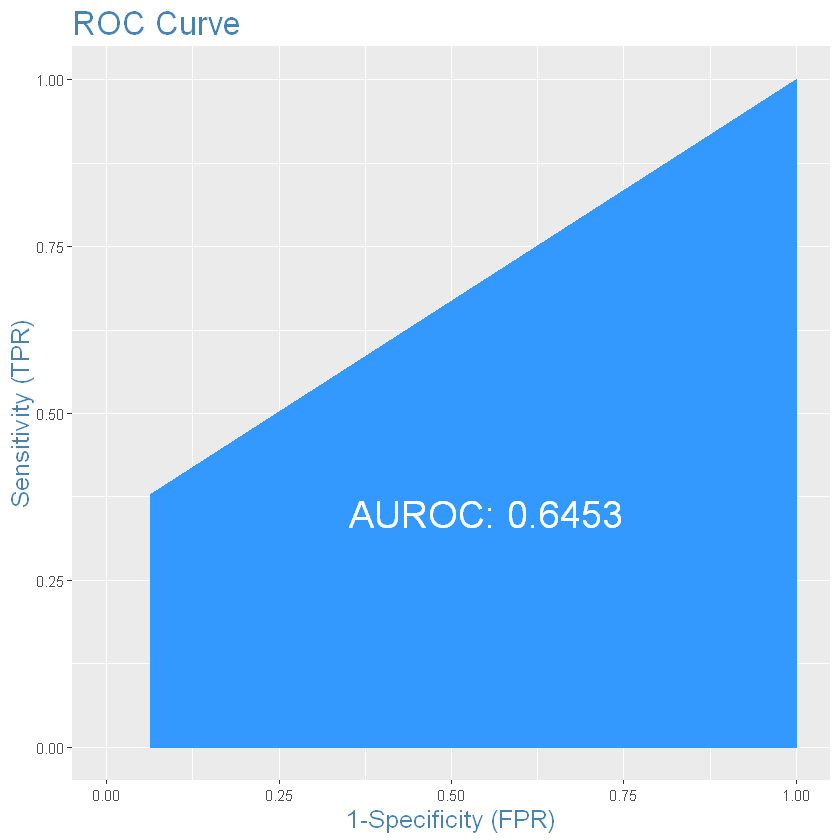

In [133]:
## All Features
## train
logmodel_all <- glm(default_payment_next_month ~ ., family = "binomial", data = train.data.norm)
## glm model should be based only on the training dataset
options(scipen = 999)
# summary(logmodel_all)
# pscl::pR2(logmodel_all)["McFadden"] # Checks fitness of model
# car::vif(logmodel_all) # Checks for multicollinearity, > 5 indicates severe multicollinearity

library(InformationValue)
# calculate probability of default for each individual in the dataset used
glm_train_pred_all <- predict(logmodel_all, train.data.norm, type="response")
# find optimal cutoff probability to use to maximize accuracy of our model, original is 0.5
optimal_all <- optimalCutoff(train.data.norm$default_payment_next_month, glm_train_pred_all)[1]
# optimal cutoff probability should be based only on the training dataset
glm_train_pred_all_opt <- ifelse(glm_train_pred_all < optimal_all, 0, 1) # use optimal_all to assign prediction for default
result_train_all <- confusionMatrix(train.data.norm$default_payment_next_month, glm_train_pred_all_opt)
result_train_all
misclass_train_all <- misClassError(train.data.norm$default_payment_next_month, glm_train_pred_all, threshold=optimal_all) # misClassError utilizes optimal_all in the threshold parameter, hence glm_train_pred_all
accuracy_train_all <- (1 - misclass_train_all) * 100
accuracy_train_all
avg_class_accuracy_train_all <- ((result_train_all$`0`[1]/(result_train_all$`0`[1] + result_train_all$`1`[1])
                                 + result_train_all$`1`[2]/(result_train_all$`0`[2] + result_train_all$`1`[2]))/2) * 100
avg_class_accuracy_train_all
plotROC(train.data.norm$default_payment_next_month, glm_train_pred_all_opt)

## All Features
## test
# calculate probability of default for each individual in the dataset used
glm_test_pred_all <- predict(logmodel_all, test.data.norm, type="response")
glm_test_pred_all_opt <- ifelse(glm_test_pred_all < optimal_all, 0, 1) # use optimal_all to assign prediction for default
result_test_all <- confusionMatrix(test.data.norm$default_payment_next_month, glm_test_pred_all_opt)
result_test_all
misclass_test_all <- misClassError(test.data.norm$default_payment_next_month, glm_test_pred_all, threshold=optimal_all) # misClassError utilizes optimal_all in the threshold parameter, hence can use glm_test_pred_all
accuracy_test_all <- (1 - misclass_test_all) * 100
accuracy_test_all
avg_class_accuracy_test_all <- ((result_test_all$`0`[1]/(result_test_all$`0`[1] + result_test_all$`1`[1])
                                 + result_test_all$`1`[2]/(result_test_all$`0`[2] + result_test_all$`1`[2]))/2) * 100
avg_class_accuracy_test_all
plotROC(test.data.norm$default_payment_next_month, glm_test_pred_all_opt)

,0,1
0,16553,3007
1,979,1961


[1] 82.28

[1] 75.66373

,0,1
0,5447,1025
1,385,643


[1] 81.2

[1] 73.35559

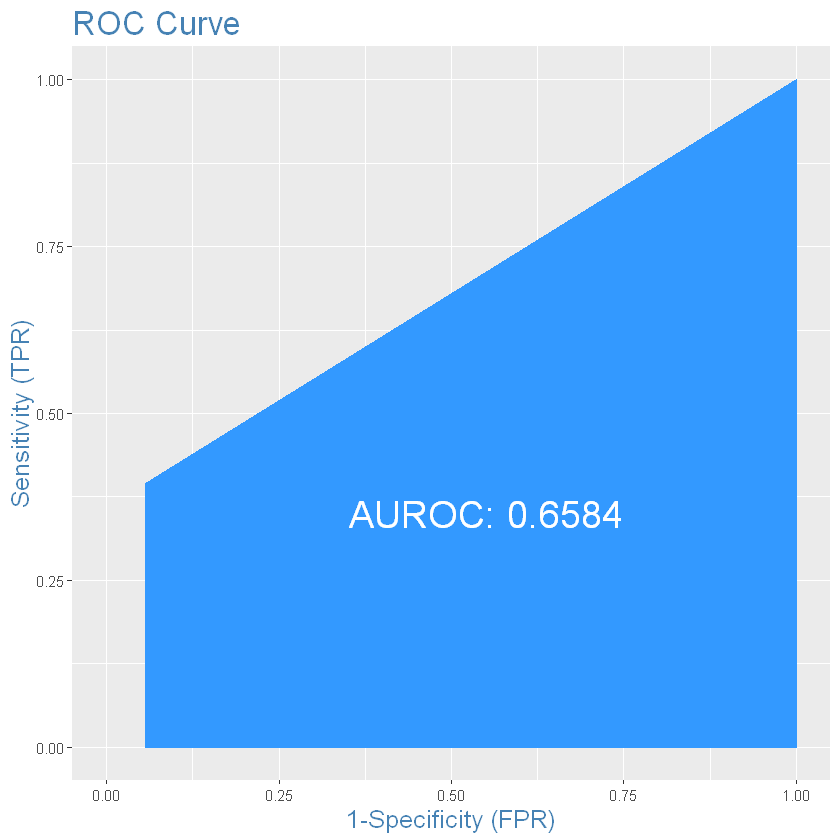

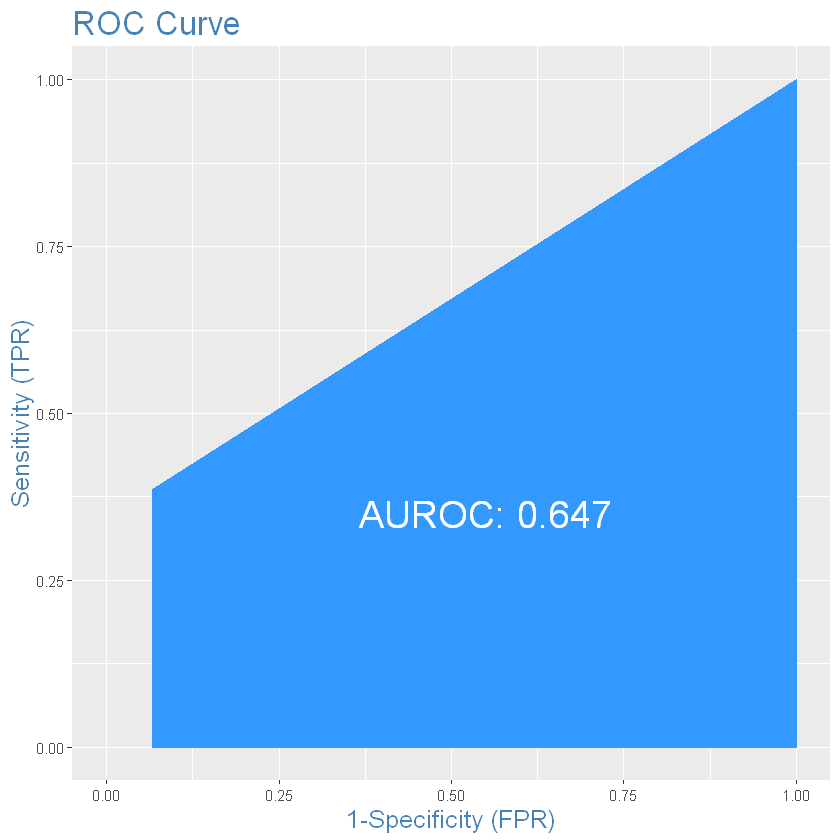

In [134]:
## Filter Method
## train
logmodel_filt <- glm(default_payment_next_month ~ . - AGE - BILL_AMT4 - BILL_AMT5 - BILL_AMT6, 
                     family = "binomial", data = train.data.norm)
## glm model should be based only on the training dataset
options(scipen = 999)
# summary(logmodel_filt)
# pscl::pR2(logmodel_filt)["McFadden"] # Checks fitness of model
# car::vif(logmodel_filt) # Checks for multicollinearity, > 5 indicates severe multicollinearity

library(InformationValue)
# calculate probability of default for each individual in the dataset used
glm_train_pred_filt <- predict(logmodel_filt, train.data.norm, type="response")
# find optimal cutoff probability to use to maximize accuracy of our model, original is 0.5
optimal_filt <- optimalCutoff(train.data.norm$default_payment_next_month, glm_train_pred_filt)[1]
# optimal cutoff probability should be based only on the training dataset
glm_train_pred_filt_opt <- ifelse(glm_train_pred_filt < optimal_filt, 0, 1) # use optimal_filt to assign prediction for default
result_train_filt <- confusionMatrix(train.data.norm$default_payment_next_month, glm_train_pred_filt_opt)
result_train_filt
misclass_train_filt <- misClassError(train.data.norm$default_payment_next_month, glm_train_pred_filt, threshold=optimal_filt) # misClassError utilizes optimal_filt in the threshold parameter, hence glm_train_pred_filt
accuracy_train_filt <- (1 - misclass_train_filt) * 100
accuracy_train_filt
avg_class_accuracy_train_filt <- ((result_train_filt$`0`[1]/(result_train_filt$`0`[1] + result_train_filt$`1`[1])
                                 + result_train_filt$`1`[2]/(result_train_filt$`0`[2] + result_train_filt$`1`[2]))/2) * 100
avg_class_accuracy_train_filt
plotROC(train.data.norm$default_payment_next_month, glm_train_pred_filt_opt)

## Filter Method
## test
# calculate probability of default for each individual in the dataset used
glm_test_pred_filt <- predict(logmodel_filt, test.data.norm, type="response")
glm_test_pred_filt_opt <- ifelse(glm_test_pred_filt < optimal_filt, 0, 1) # use optimal_filt to assign prediction for default
result_test_filt <- confusionMatrix(test.data.norm$default_payment_next_month, glm_test_pred_filt_opt)
result_test_filt
misclass_test_filt <- misClassError(test.data.norm$default_payment_next_month, glm_test_pred_filt, threshold=optimal_filt) # misClassError utilizes optimal_filt in the threshold parameter, hence can use glm_test_pred_filt
accuracy_test_filt <- (1 - misclass_test_filt) * 100
accuracy_test_filt
avg_class_accuracy_test_filt <- ((result_test_filt$`0`[1]/(result_test_filt$`0`[1] + result_test_filt$`1`[1])
                                 + result_test_filt$`1`[2]/(result_test_filt$`0`[2] + result_test_filt$`1`[2]))/2) * 100
avg_class_accuracy_test_filt
plotROC(test.data.norm$default_payment_next_month, glm_test_pred_filt_opt)

,0,1
0,16669,3129
1,863,1839


[1] 82.26

[1] 76.12803

,0,1
0,5492,1070
1,340,598


[1] 81.2

[1] 73.72333

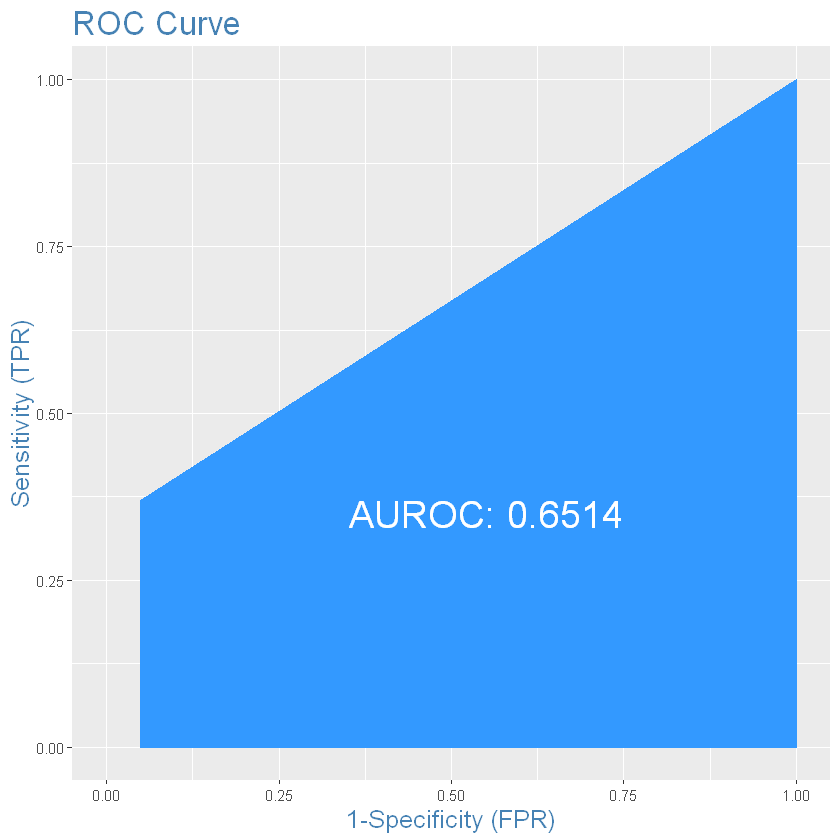

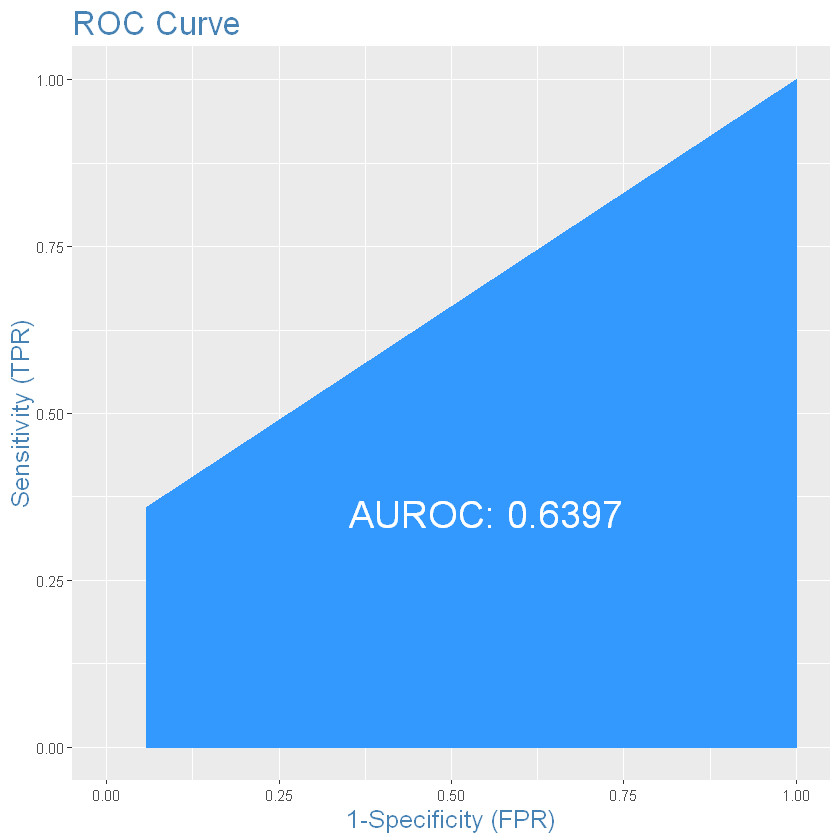

In [135]:
## Boruta
## train
logmodel_boru <- glm(default_payment_next_month ~ . - SEX, family = "binomial", data = train.data.norm)
## glm model should be based only on the training dataset
options(scipen = 999)
# summary(logmodel_boru)
# pscl::pR2(logmodel_boru)["McFadden"] # Checks fitness of model
# car::vif(logmodel_boru) # Checks for multicollinearity, > 5 indicates severe multicollinearity

library(InformationValue)
# calculate probability of default for each individual in the dataset used
glm_train_pred_boru <- predict(logmodel_boru, train.data.norm, type="response")
# find optimal cutoff probability to use to maximize accuracy of our model, original is 0.5
optimal_boru <- optimalCutoff(train.data.norm$default_payment_next_month, glm_train_pred_boru)[1]
# optimal cutoff probability should be based only on the training dataset
glm_train_pred_boru_opt <- ifelse(glm_train_pred_boru < optimal_boru, 0, 1) # use optimal_boru to assign prediction for default
result_train_boru <- confusionMatrix(train.data.norm$default_payment_next_month, glm_train_pred_boru_opt)
result_train_boru
misclass_train_boru <- misClassError(train.data.norm$default_payment_next_month, glm_train_pred_boru, threshold=optimal_boru) # misClassError utilizes optimal_boru in the threshold parameter, hence glm_train_pred_boru
accuracy_train_boru <- (1 - misclass_train_boru) * 100
accuracy_train_boru
avg_class_accuracy_train_boru <- ((result_train_boru$`0`[1]/(result_train_boru$`0`[1] + result_train_boru$`1`[1])
                                 + result_train_boru$`1`[2]/(result_train_boru$`0`[2] + result_train_boru$`1`[2]))/2) * 100
avg_class_accuracy_train_boru
plotROC(train.data.norm$default_payment_next_month, glm_train_pred_boru_opt)

## Boruta
## test
# calculate probability of default for each individual in the dataset used
glm_test_pred_boru <- predict(logmodel_boru, test.data.norm, type="response")
glm_test_pred_boru_opt <- ifelse(glm_test_pred_boru < optimal_boru, 0, 1) # use optimal_boru to assign prediction for default
result_test_boru <- confusionMatrix(test.data.norm$default_payment_next_month, glm_test_pred_boru_opt)
result_test_boru
misclass_test_boru <- misClassError(test.data.norm$default_payment_next_month, glm_test_pred_boru, threshold=optimal_boru) # misClassError utilizes optimal_boru in the threshold parameter, hence can use glm_test_pred_boru
accuracy_test_boru <- (1 - misclass_test_boru) * 100
accuracy_test_boru
avg_class_accuracy_test_boru <- ((result_test_boru$`0`[1]/(result_test_boru$`0`[1] + result_test_boru$`1`[1])
                                 + result_test_boru$`1`[2]/(result_test_boru$`0`[2] + result_test_boru$`1`[2]))/2) * 100
avg_class_accuracy_test_boru
plotROC(test.data.norm$default_payment_next_month, glm_test_pred_boru_opt)

,0,1
0,16498,2979
1,1034,1989


[1] 82.16

[1] 75.2503

,0,1
0,5437,1001
1,395,667


[1] 81.39

[1] 73.62886

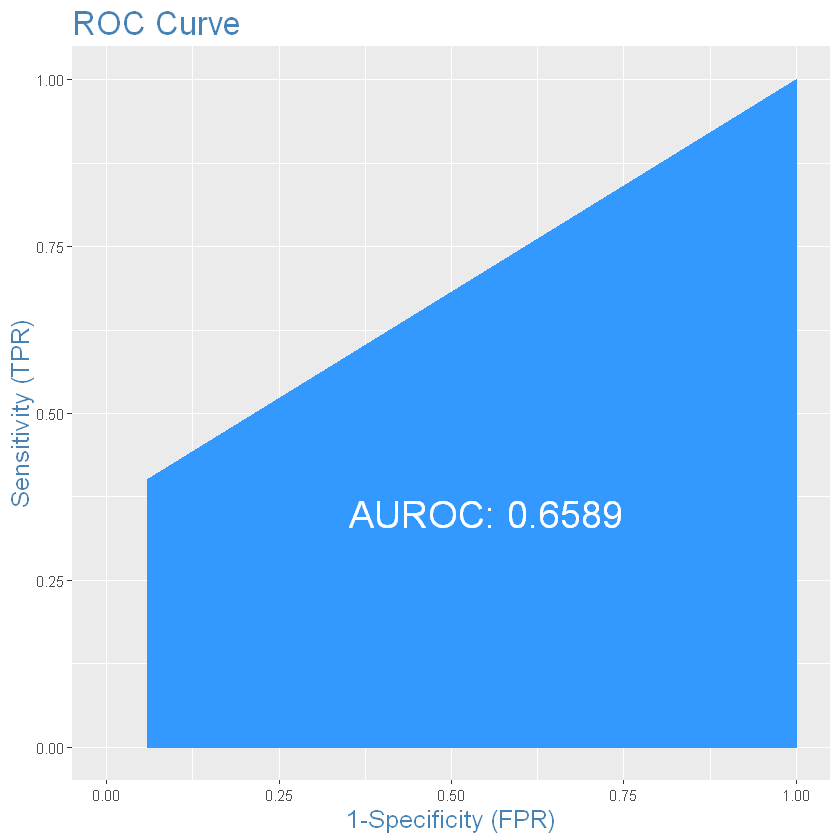

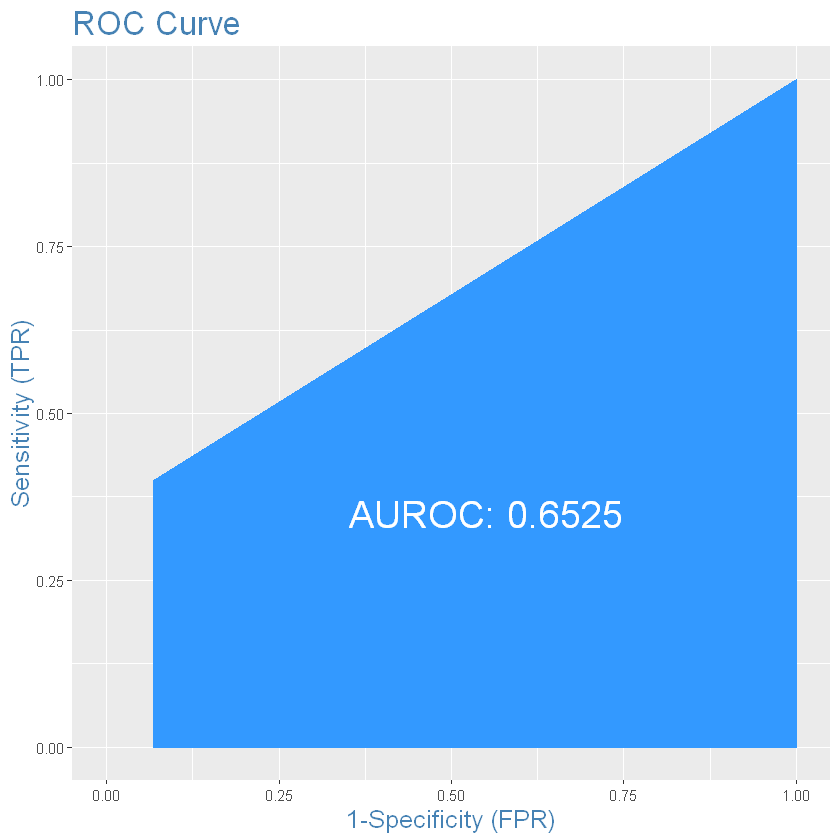

In [136]:
## Stepwise AIC Backward Regression Feature Selection
## train
logmodel_step <- glm(default_payment_next_month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE 
                     + PAY_0 + PAY_2 + PAY_3 + PAY_5 + BILL_AMT2 + BILL_AMT5 + PAY_AMT1 + PAY_AMT2, 
                     family = "binomial", data = train.data.norm)
## glm model should be based only on the training dataset
options(scipen = 999)
# summary(logmodel_step)
# pscl::pR2(logmodel_step)["McFadden"] # Checks fitness of model
# car::vif(logmodel_step) # Checks for multicollinearity, > 5 indicates severe multicollinearity

library(InformationValue)
# calculate probability of default for each individual in the dataset used
glm_train_pred_step <- predict(logmodel_step, train.data.norm, type="response")
# find optimal cutoff probability to use to maximize accuracy of our model, original is 0.5
optimal_step <- optimalCutoff(train.data.norm$default_payment_next_month, glm_train_pred_step)[1]
# optimal cutoff probability should be based only on the training dataset
glm_train_pred_step_opt <- ifelse(glm_train_pred_step < optimal_step, 0, 1) # use optimal_step to assign prediction for default
result_train_step <- confusionMatrix(train.data.norm$default_payment_next_month, glm_train_pred_step_opt)
result_train_step
misclass_train_step <- misClassError(train.data.norm$default_payment_next_month, glm_train_pred_step, threshold=optimal_step) # misClassError utilizes optimal_step in the threshold parameter, hence glm_train_pred_step
accuracy_train_step <- (1 - misclass_train_step) * 100
accuracy_train_step
avg_class_accuracy_train_step <- ((result_train_step$`0`[1]/(result_train_step$`0`[1] + result_train_step$`1`[1])
                                 + result_train_step$`1`[2]/(result_train_step$`0`[2] + result_train_step$`1`[2]))/2) * 100
avg_class_accuracy_train_step
plotROC(train.data.norm$default_payment_next_month, glm_train_pred_step_opt)

## test
# calculate probability of default for each individual in the dataset used
glm_test_pred_step <- predict(logmodel_step, test.data.norm, type="response")
glm_test_pred_step_opt <- ifelse(glm_test_pred_step < optimal_step, 0, 1) # use optimal_step to assign prediction for default
result_test_step <- confusionMatrix(test.data.norm$default_payment_next_month, glm_test_pred_step_opt)
result_test_step
misclass_test_step <- misClassError(test.data.norm$default_payment_next_month, glm_test_pred_step, threshold=optimal_step) # misClassError utilizes optimal_step in the threshold parameter, hence can use glm_test_pred_step
accuracy_test_step <- (1 - misclass_test_step) * 100
accuracy_test_step
avg_class_accuracy_test_step <- ((result_test_step$`0`[1]/(result_test_step$`0`[1] + result_test_step$`1`[1])
                                 + result_test_step$`1`[2]/(result_test_step$`0`[2] + result_test_step$`1`[2]))/2) * 100
avg_class_accuracy_test_step
plotROC(test.data.norm$default_payment_next_month, glm_test_pred_step_opt)

,0,1
0,16587,3044
1,945,1924


[1] 82.27

[1] 75.7778

,0,1
0,5457,1035
1,375,633


[1] 81.2

[1] 73.42746

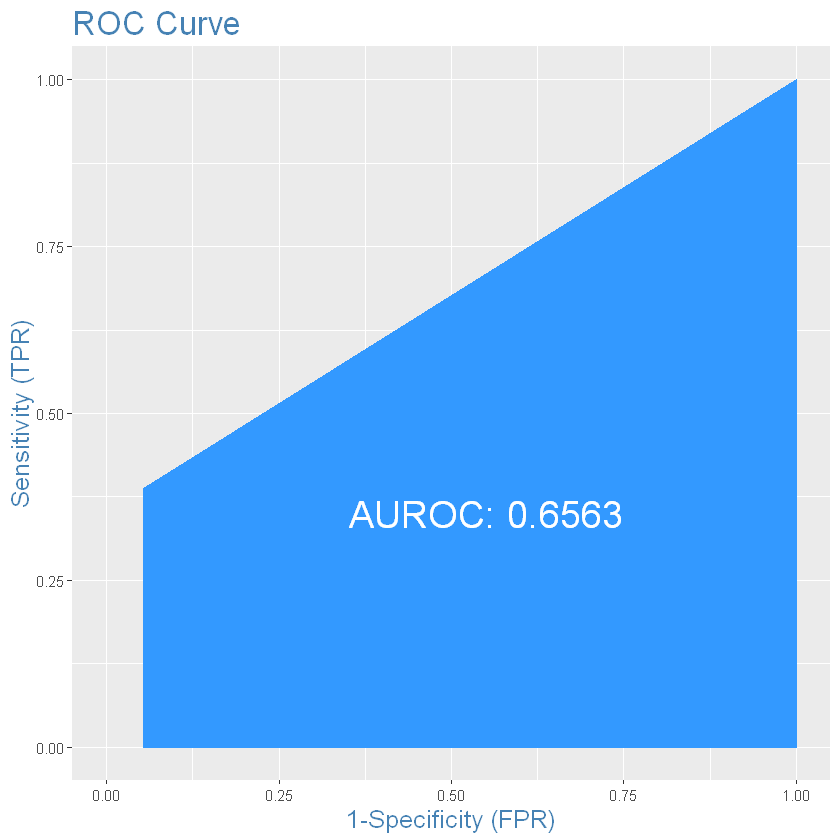

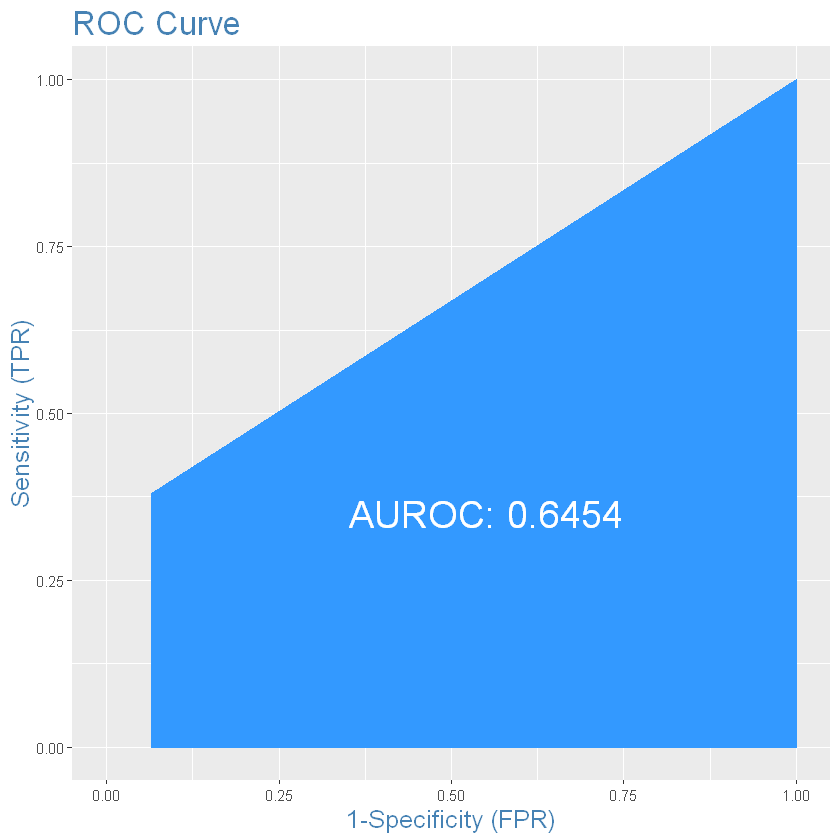

In [151]:
## Lasso Regression Feature Selection
## train
logmodel_lass <- glm(default_payment_next_month ~ . - BILL_AMT2 - BILL_AMT3 - BILL_AMT4 - BILL_AMT5 - BILL_AMT6, 
                     family = "binomial", data = train.data.norm)
## glm model should be based only on the training dataset
options(scipen = 999)
# summary(logmodel_lass)
# pscl::pR2(logmodel_lass)["McFadden"] # Checks fitness of model
# car::vif(logmodel_lass) # Checks for multicollinearity, > 5 indicates severe multicollinearity

library(InformationValue)
# calculate probability of default for each individual in the dataset used
glm_train_pred_lass <- predict(logmodel_lass, train.data.norm, type="response")
# find optimal cutoff probability to use to maximize accuracy of our model, original is 0.5
optimal_lass <- optimalCutoff(train.data.norm$default_payment_next_month, glm_train_pred_lass)[1]
# optimal cutoff probability should be based only on the training dataset
glm_train_pred_lass_opt <- ifelse(glm_train_pred_lass < optimal_lass, 0, 1) # use optimal_lass to assign prediction for default
result_train_lass <- confusionMatrix(train.data.norm$default_payment_next_month, glm_train_pred_lass_opt)
result_train_lass
misclass_train_lass <- misClassError(train.data.norm$default_payment_next_month, glm_train_pred_lass, threshold=optimal_lass) # misClassError utilizes optimal_lass in the threshold parameter, hence glm_train_pred_lass
accuracy_train_lass <- (1 - misclass_train_lass) * 100
accuracy_train_lass
avg_class_accuracy_train_lass <- ((result_train_lass$`0`[1]/(result_train_lass$`0`[1] + result_train_lass$`1`[1])
                                 + result_train_lass$`1`[2]/(result_train_lass$`0`[2] + result_train_lass$`1`[2]))/2) * 100
avg_class_accuracy_train_lass
plotROC(train.data.norm$default_payment_next_month, glm_train_pred_lass_opt)

## test
# calculate probability of default for each individual in the dataset used
glm_test_pred_lass <- predict(logmodel_lass, test.data.norm, type="response")
glm_test_pred_lass_opt <- ifelse(glm_test_pred_lass < optimal_lass, 0, 1) # use optimal_lass to assign prediction for default
result_test_lass <- confusionMatrix(test.data.norm$default_payment_next_month, glm_test_pred_lass_opt)
result_test_lass
misclass_test_lass <- misClassError(test.data.norm$default_payment_next_month, glm_test_pred_lass, threshold=optimal_lass) # misClassError utilizes optimal_lass in the threshold parameter, hence can use glm_test_pred_lass
accuracy_test_lass <- (1 - misclass_test_lass) * 100
accuracy_test_lass
avg_class_accuracy_test_lass <- ((result_test_lass$`0`[1]/(result_test_lass$`0`[1] + result_test_lass$`1`[1])
                                 + result_test_lass$`1`[2]/(result_test_lass$`0`[2] + result_test_lass$`1`[2]))/2) * 100
avg_class_accuracy_test_lass
plotROC(test.data.norm$default_payment_next_month, glm_test_pred_lass_opt)

,0,1
0,16790,3275
1,742,1693


[1] 82.15

[1] 76.60288

,0,1
0,5555,1120
1,277,548


[1] 81.37

[1] 74.82261

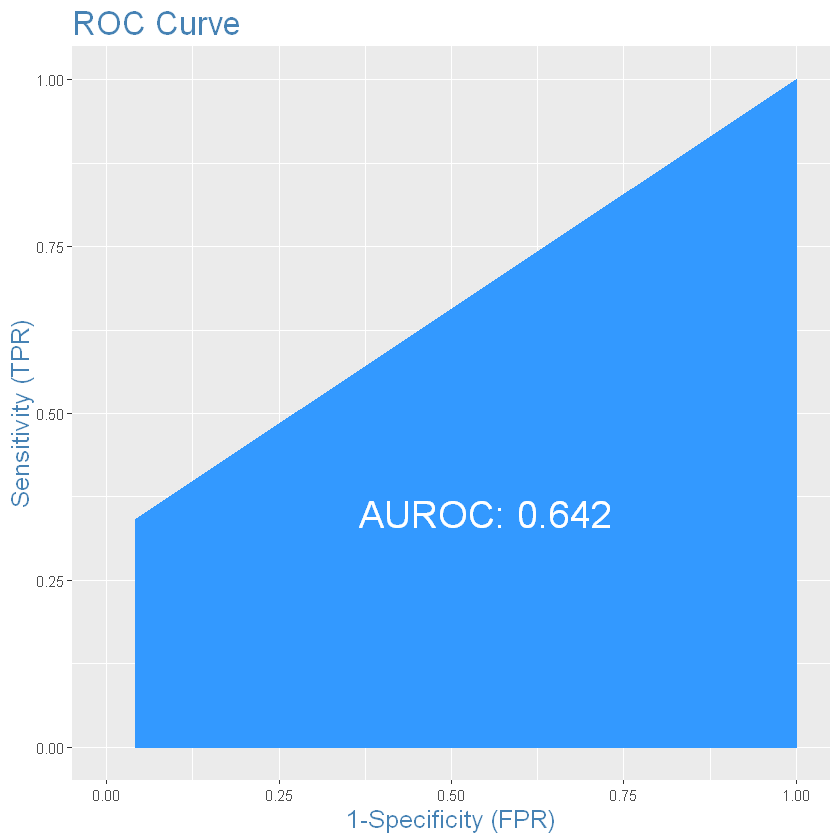

[1] 0.4573821

[1] 0.4601714

[1] 0.3651726

[1] 0.3429098

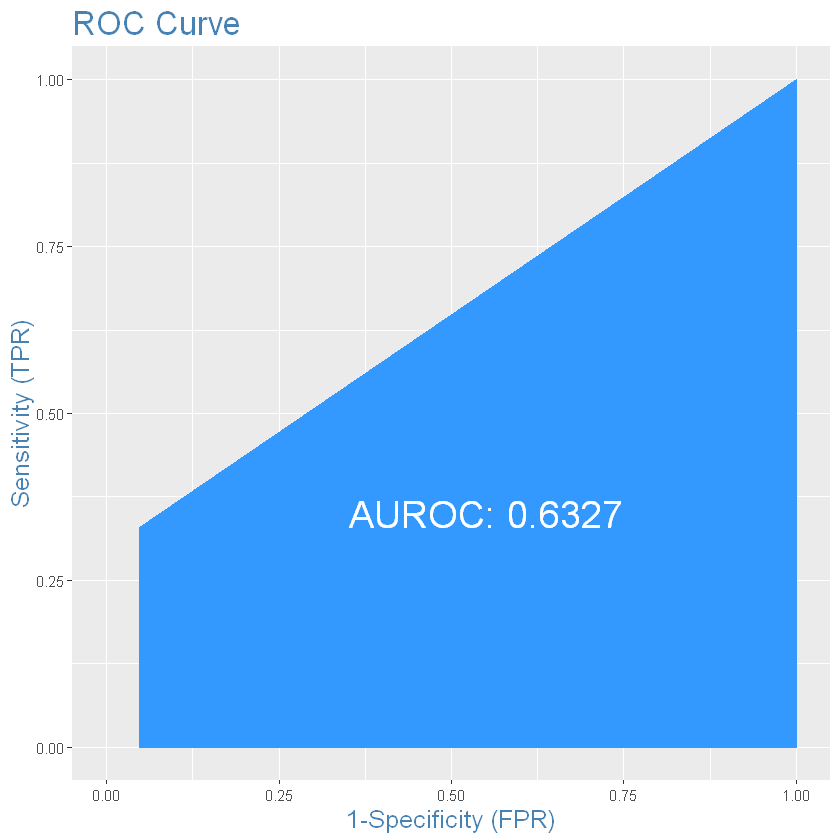

In [156]:
## Random Forest Feature Selection
## train
logmodel_rand <- glm(default_payment_next_month ~ PAY_0 + BILL_AMT1 + AGE + BILL_AMT2 + LIMIT_BAL 
                   + BILL_AMT3 + PAY_AMT1 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6, 
                     family = "binomial", data = train.data.norm)
## glm model should be based only on the training dataset
options(scipen = 999)
# summary(logmodel_rand)
# pscl::pR2(logmodel_rand)["McFadden"] # Checks fitness of model
# car::vif(logmodel_rand) # Checks for multicollinearity, > 5 indicates severe multicollinearity

library(InformationValue)
# calculate probability of default for each individual in the dataset used
glm_train_pred_rand <- predict(logmodel_rand, train.data.norm, type="response")
# find optimal cutoff probability to use to maximize accuracy of our model, original is 0.5
optimal_rand <- optimalCutoff(train.data.norm$default_payment_next_month, glm_train_pred_rand)[1]
# optimal cutoff probability should be based only on the training dataset
glm_train_pred_rand_opt <- ifelse(glm_train_pred_rand < optimal_rand, 0, 1) # use optimal_rand to assign prediction for default
result_train_rand <- confusionMatrix(train.data.norm$default_payment_next_month, glm_train_pred_rand_opt)
result_train_rand
misclass_train_rand <- misClassError(train.data.norm$default_payment_next_month, glm_train_pred_rand, threshold=optimal_rand) # misClassError utilizes optimal_rand in the threshold parameter, hence glm_train_pred_rand
accuracy_train_rand <- (1 - misclass_train_rand) * 100
accuracy_train_rand
avg_class_accuracy_train_rand <- ((result_train_rand$`0`[1]/(result_train_rand$`0`[1] + result_train_rand$`1`[1])
                                 + result_train_rand$`1`[2]/(result_train_rand$`0`[2] + result_train_rand$`1`[2]))/2) * 100
avg_class_accuracy_train_rand
plotROC(train.data.norm$default_payment_next_month, glm_train_pred_rand_opt)

## test
# calculate probability of default for each individual in the dataset used
glm_test_pred_rand <- predict(logmodel_rand, test.data.norm, type="response")
glm_test_pred_rand_opt <- ifelse(glm_test_pred_rand < optimal_rand, 0, 1) # use optimal_rand to assign prediction for default
result_test_rand <- confusionMatrix(test.data.norm$default_payment_next_month, glm_test_pred_rand_opt)
result_test_rand
misclass_test_rand <- misClassError(test.data.norm$default_payment_next_month, glm_test_pred_rand, threshold=optimal_rand) # misClassError utilizes optimal_rand in the threshold parameter, hence can use glm_test_pred_rand
accuracy_test_rand <- (1 - misclass_test_rand) * 100
accuracy_test_rand
avg_class_accuracy_test_rand <- ((result_test_rand$`0`[1]/(result_test_rand$`0`[1] + result_test_rand$`1`[1])
                                 + result_test_rand$`1`[2]/(result_test_rand$`0`[2] + result_test_rand$`1`[2]))/2) * 100
avg_class_accuracy_test_rand
plotROC(test.data.norm$default_payment_next_month, glm_test_pred_rand_opt)

precision_train <- result_train_rand$`1`[2]/(result_train_rand$`1`[2] + result_train_rand$`0`[2])
recall_train <- result_train_rand$`1`[2]/(result_train_rand$`1`[2]+result_train_rand$`1`[1])
f1_train <- 2*((precision_train*recall_train)/(precision_train+recall_train))
f1_train

precision_test <- result_test_rand$`1`[2]/(result_test_rand$`1`[2] + result_test_rand$`0`[2])
recall_test <- result_test_rand$`1`[2]/(result_test_rand$`1`[2]+result_test_rand$`1`[1])
f1_test <- 2*((precision_train*recall_test)/(precision_test+recall_test))
f1_test

tp_train <- result_train_rand$`1`[2]
tn_train <- result_train_rand$`0`[1]
fp_train <- result_train_rand$`0`[2]
fn_train <- result_train_rand$`1`[1]

total_train <- tp_train+fn_train+fp_train+tn_train
po_train <- (tp_train+tn_train)/total_train
pe_train <- (((tp_train+fn_train)/total_train)*((tp_train+fp_train)/total_train))+(((fn_train+tn_train)/total_train)*((fp_train+tn_train)/total_train))
kappa_train <- (po_train-pe_train)/(1-pe_train)
kappa_train

tp_test <- result_test_rand$`1`[2]
tn_test <- result_test_rand$`0`[1]
fp_test <- result_test_rand$`0`[2]
fn_test <- result_test_rand$`1`[1]

total_test <- tp_test+fn_test+fp_test+tn_test
po_test <- (tp_test+tn_test)/total_test
pe_test <- (((tp_test+fn_test)/total_test)*((tp_test+fp_test)/total_test))+(((fn_test+tn_test)/total_test)*((fp_test+tn_test)/total_test))
kappa_test <- (po_test-pe_test)/(1-pe_test)
kappa_test

# 5.4 Support Vector Model

In [166]:
train.data.norm$SEX <- as.factor(train.data.norm$SEX)
train.data.norm$EDUCATION <- as.factor(train.data.norm$EDUCATION)
train.data.norm$MARRIAGE <- as.factor(train.data.norm$MARRIAGE)
train.data.norm$default_payment_next_month <- as.factor(train.data.norm$default_payment_next_month)
# train.data.norm$PAY_0 <-as.factor(train.data.norm$PAY_0)
#train.data.norm$PAY_2 <- as.factor(train.data.norm$PAY_2)
# train.data.norm$PAY_3 <- as.factor(train.data.norm$PAY_3)
# train.data.norm$PAY_4 <- as.factor(train.data.norm$PAY_4)
# train.data.norm$PAY_5 <- as.factor(train.data.norm$PAY_5)
# train.data.norm$PAY_6 <- as.factor(train.data.norm$PAY_6)

test.data.norm$SEX <- as.factor(test.data.norm$SEX)
test.data.norm$EDUCATION <- as.factor(test.data.norm$EDUCATION)
test.data.norm$MARRIAGE <- as.factor(test.data.norm$MARRIAGE)
test.data.norm$default_payment_next_month <- as.factor(test.data.norm$default_payment_next_month)
# test.data.norm$PAY_0 <-as.factor(test.data.norm$PAY_0)
# test.data.norm$PAY_2 <- as.factor(test.data.norm$PAY_2)
# unique(test.data.norm$PAY_2)
# test.data.norm$PAY_3 <- as.factor(test.data.norm$PAY_3)
# test.data.norm$PAY_4 <- as.factor(test.data.norm$PAY_4)
# test.data.norm$PAY_5 <- as.factor(test.data.norm$PAY_5)
# test.data.norm$PAY_6 <- as.factor(test.data.norm$PAY_6)

train_var <- train.data.norm$default_payment_next_month
test_var <- test.data.norm$default_payment_next_month

In [167]:
library(e1071)

#kernal = linear 
svm_linear <- svm(train_var~LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+
                    PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+
                    BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+
                    PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6, data = train.data.norm, type = "C-classification", kernel = "linear")
train_norm_pred <- predict(svm_linear, data = train.data.norm, type = "class")
test_norm_pred <- predict(svm_linear, newdata = test.data.norm, type = "class")

con_train <- as.matrix(table(prediction = train_norm_pred, actual = train_var))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
mean(train_norm_pred == train_var)
meanacc_train

con_test <- as.matrix(table(prediction = test_norm_pred, actual = test_var))
# con_test <- confusionMatrix(table(data = test_norm_pred, reference = test_var))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
mean(test_norm_pred == test_var)
meanacc_test

          actual
prediction     0     1
         0 16641  3086
         1   891  1882

[1] 0.8232444

[1] 0.6640016

          actual
prediction    0    1
         0 5483 1036
         1  349  632

[1] 0.8153333

[1] 0.6595273

In [168]:
# kernal = polynomial 
svm_poly <- svm(train_var~LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+
                    PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+
                    BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+
                    PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6, data = train.data.norm, type = "C-classification", kernel = "polynomial")
train_norm_pred <- predict(svm_poly, data = train.data.norm, type = "class")
test_norm_pred <- predict(svm_poly, newdata = test.data.norm, type = "class")


con_train <- as.matrix(table(prediction = train_norm_pred, actual = train_var))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
mean(train_norm_pred == train_var)
meanacc_train

con_test <- as.matrix(table(prediction = test_norm_pred, actual = test_var))
# con_test <- confusionMatrix(table(data = test_norm_pred, reference = test_var))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
mean(test_norm_pred == test_var)
meanacc_test

          actual
prediction     0     1
         0 16854  3270
         1   678  1698

[1] 0.8245333

[1] 0.6515576

          actual
prediction    0    1
         0 5543 1130
         1  289  538

[1] 0.8108

[1] 0.6364939

In [169]:
# kernal = radial 
svm_rad <- svm(train_var~LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+
                    PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+
                    BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+
                    PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6, data = train.data.norm, type = "C-classification", kernel = "radial")
train_norm_pred <- predict(svm_rad, data = train.data.norm, type = "class")
test_norm_pred <- predict(svm_rad, newdata = test.data.norm, type = "class")

con_train <- as.matrix(table(prediction = train_norm_pred, actual = train_var))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
mean(train_norm_pred == train_var)
meanacc_train

con_test <- as.matrix(table(prediction = test_norm_pred, actual = test_var))
# con_test <- confusionMatrix(table(data = test_norm_pred, reference = test_var))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
mean(test_norm_pred == test_var)
meanacc_test

          actual
prediction     0     1
         0 16732  3091
         1   800  1877

[1] 0.8270667

[1] 0.6660936

          actual
prediction    0    1
         0 5512 1074
         1  320  594

[1] 0.8141333

[1] 0.6506227

In [170]:
# kernal = sigmoid 
svm_sig <- svm(train_var~LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+
                    PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+
                    BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+
                    PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6, data = train.data.norm, type = "C-classification", kernel = "sigmoid")
train_norm_pred <- predict(svm_sig, data = train.data.norm, type = "class")
test_norm_pred <- predict(svm_sig, newdata = test.data.norm, type = "class")

con_train <- as.matrix(table(prediction = train_norm_pred, actual = train_var))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
mean(train_norm_pred == train_var)
meanacc_train

con_test <- as.matrix(table(prediction = test_norm_pred, actual = test_var))
# con_test <- confusionMatrix(table(data = test_norm_pred, reference = test_var))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
mean(test_norm_pred == test_var)
meanacc_test

          actual
prediction     0     1
         0 14811  3201
         1  2721  1767

[1] 0.7368

[1] 0.6002372

          actual
prediction    0    1
         0 4872 1092
         1  960  576

[1] 0.7264

[1] 0.5903573

In [171]:
# kernal = sigmoid 
svm_fil <- svm(train_var~LIMIT_BAL+SEX+EDUCATION+MARRIAGE+
                    PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+
                    BILL_AMT1+BILL_AMT2+BILL_AMT3+
                    PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6, data = train.data.norm, type = "C-classification", kernel = "radial")
train_norm_pred <- predict(svm_fil, data = train.data.norm, type = "class")
test_norm_pred <- predict(svm_fil, newdata = test.data.norm, type = "class")

con_train <- as.matrix(table(prediction = train_norm_pred, actual = train_var))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
mean(train_norm_pred == train_var)
meanacc_train

con_test <- as.matrix(table(prediction = test_norm_pred, actual = test_var))
# con_test <- confusionMatrix(table(data = test_norm_pred, reference = test_var))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
mean(test_norm_pred == test_var)
meanacc_test

          actual
prediction     0     1
         0 16726  3089
         1   806  1879

[1] 0.8268889

[1] 0.6661238

          actual
prediction    0    1
         0 5514 1074
         1  318  594

[1] 0.8144

[1] 0.6507942

In [172]:
# kernal = sigmoid 
svm_bor <- svm(train_var~LIMIT_BAL+MARRIAGE+AGE+EDUCATION+
                    PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+
                    BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+
                    PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6, data = train.data.norm, type = "C-classification", kernel = "radial")
train_norm_pred <- predict(svm_bor, data = train.data.norm, type = "class")
test_norm_pred <- predict(svm_bor, newdata = test.data.norm, type = "class")

con_train <- as.matrix(table(prediction = train_norm_pred, actual = train_var))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
mean(train_norm_pred == train_var)
meanacc_train

con_test <- as.matrix(table(prediction = test_norm_pred, actual = test_var))
# con_test <- confusionMatrix(table(data = test_norm_pred, reference = test_var))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
mean(test_norm_pred == test_var)
meanacc_test

          actual
prediction     0     1
         0 16729  3090
         1   803  1878

[1] 0.8269778

[1] 0.6661087

          actual
prediction    0    1
         0 5513 1074
         1  319  594

[1] 0.8142667

[1] 0.6507084

In [173]:
# kernal = radial 
svm_back <- svm(train_var~LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+
                    PAY_0+PAY_2+PAY_3+PAY_5+
                    BILL_AMT2+BILL_AMT5+
                    PAY_AMT1+PAY_AMT2, data = train.data.norm, type = "C-classification", kernel = "radial")
train_norm_pred <- predict(svm_back, data = train.data.norm, type = "class")
test_norm_pred <- predict(svm_back, newdata = test.data.norm, type = "class")

con_train <- as.matrix(table(prediction = train_norm_pred, actual = train_var))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
mean(train_norm_pred == train_var)
meanacc_train

con_test <- as.matrix(table(prediction = test_norm_pred, actual = test_var))
# con_test <- confusionMatrix(table(data = test_norm_pred, reference = test_var))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
mean(test_norm_pred == test_var)
meanacc_test

          actual
prediction     0     1
         0 16755  3171
         1   777  1797

[1] 0.8245333

[1] 0.658698

          actual
prediction    0    1
         0 5523 1079
         1  309  589

[1] 0.8149333

[1] 0.650067

In [174]:
# kernal = radial 
svm_las <- svm(train_var~LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+
                    PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+
                    BILL_AMT1+
                    PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6, data = train.data.norm, type = "C-classification", kernel = "radial")
train_norm_pred <- predict(svm_las, data = train.data.norm, type = "class")
test_norm_pred <- predict(svm_las, newdata = test.data.norm, type = "class")

#con_train <- confusionMatrix(table(data = train_norm_pred, reference = train_var))
con_train <- as.matrix(table(prediction = train_norm_pred, actual = train_var))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
mean(train_norm_pred == train_var)
meanacc_train

con_test <- as.matrix(table(prediction = test_norm_pred, actual = test_var))
# con_test <- confusionMatrix(table(data = test_norm_pred, reference = test_var))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
mean(test_norm_pred == test_var)
meanacc_test

precision_train <- con_train[4]/(con_train[4]+con_train[2])
recall_train <- con_train[4]/(con_train[4]+con_train[3])
f1_train <- 2*((precision_train*recall_train)/(precision_train+recall_train))
f1_train

precision_test <- con_test[4]/(con_test[4]+con_test[2])
recall_test <- con_test[4]/(con_test[4]+con_test[3])
f1_test <- 2*((precision_test*recall_test)/(precision_test+recall_test))
f1_test

tp_train <- con_train[4]
tn_train <- con_train[1]
fp_train <- con_train[2]
fn_train <- con_train[3]

total_train <- con_train[4]+con_train[3]+con_train[2]+con_train[1]
po_train <- (con_train[4]+con_train[1])/total_train
pe_train <- (((tp_train+fn_train)/total_train)*((tp_train+fp_train)/total_train))+(((fn_train+tn_train)/total_train)*((fp_train+tn_train)/total_train))
kappa_train <- (po_train-pe_train)/(1-pe_train)
kappa_train

tp_test <- con_test[4]
tn_test <- con_test[1]
fp_test <- con_test[2]
fn_test <- con_test[3]

total_test <- tp_test+fn_test+fp_test+tn_test
po_test <- (tp_test+tn_test)/total_test
pe_test <- (((tp_test+fn_test)/total_test)*((tp_test+fp_test)/total_test))+(((fn_test+tn_test)/total_test)*((fp_test+tn_test)/total_test))
kappa_test <- (po_test-pe_test)/(1-pe_test)
kappa_test

          actual
prediction     0     1
         0 16720  3082
         1   812  1886

[1] 0.8269333

[1] 0.6666572

          actual
prediction    0    1
         0 5505 1072
         1  327  596

[1] 0.8134667

[1] 0.6506221

[1] 0.4920428

[1] 0.460054

[1] 0.3985695

[1] 0.3583892

In [175]:
# kernal = radial 
svm_ran <- svm(train_var~LIMIT_BAL+AGE+
                    PAY_0+
                    BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT4+BILL_AMT5+BILL_AMT6, data = train.data.norm, type = "C-classification", kernel = "radial")
train_norm_pred <- predict(svm_ran, data = train.data.norm, type = "class")
test_norm_pred <- predict(svm_ran, newdata = test.data.norm, type = "class")

con_train <- as.matrix(table(prediction = train_norm_pred, actual = train_var))
con_train
meanacc_train <- (con_train[4]/(con_train[4]+con_train[3]) + con_train[1]/(con_train[1]+con_train[2]))*0.5
mean(train_norm_pred == train_var)
meanacc_train

con_test <- as.matrix(table(prediction = test_norm_pred, actual = test_var))
# con_test <- confusionMatrix(table(data = test_norm_pred, reference = test_var))
con_test
meanacc_test <- (con_test[4]/(con_test[4]+con_test[3]) + con_test[1]/(con_test[1]+con_test[2]))*0.5
mean(test_norm_pred == test_var)
meanacc_test

          actual
prediction     0     1
         0 16885  3359
         1   647  1609

[1] 0.8219556

[1] 0.6434844

          actual
prediction    0    1
         0 5588 1160
         1  244  508

[1] 0.8128

[1] 0.6313591

# 7. Limitations and Improvements

# 7.1 Imbalance in PAY_2, PAY_4, PAY_5, PAY_6 factor levels in train & test set

In [177]:
sort(unique(test.data.norm$PAY_2))
sort(unique(train.data.norm$PAY_2)) 

sort(unique(test.data.norm$PAY_4))
sort(unique(train.data.norm$PAY_4))

sort(unique(test.data.norm$PAY_5))
sort(unique(train.data.norm$PAY_5))

sort(unique(test.data.norm$PAY_6))
sort(unique(train.data.norm$PAY_6))

[1] 0 1 2 3 4 5 6 7

[1] 0 1 2 3 4 5 6 7 8

[1] 0 1 2 3 4 5 6 7

[1] 0 1 2 3 4 5 6 7 8

[1] 0 2 3 4 5 6 7

[1] 0 2 3 4 5 6 7 8

[1] 0 2 3 4 5 6 7

[1] 0 2 3 4 5 6 7 8